In [21]:
import ipp
compModel = {}
model_Eval = ipp.pd.DataFrame()
ipp.warnings.filterwarnings("ignore")

### Load the data

In [22]:
df = ipp.pd.read_csv('/Users/nikhilprao/Documents/Data/Boston.csv', index_col=0)
df.reset_index(drop=True)

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
0       15.3   4.98  24.0  
1       17.8   9.14  21.6  
2       17.8   4.03  34.7  
3       18.7   2.94  33.4  
4       18.7   5.33  36.2  
..       ...    ...   ...  
501     21.0   9.67  22.4  
502     21.0   9.08  20.6  
503     21.0   5.64  23.9  
504     21.0   6.48  22.0  
505     21.0   7.88  11.9  

[506 rows x 13 columns]

### Preprocess NULL

In [23]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [24]:
# applying the method
nan_in_df = df.isnull().sum().any()
 
# Print the dataframe
print(type(nan_in_df))

<class 'numpy.bool_'>


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [26]:
type(df)

pandas.core.frame.DataFrame

In [27]:
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       lstat  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.105710    8.707259  168.537116    2.164946    7.141062   
min      2.900000    1.129600    1.000000  187.000000   12.600000    1.730000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000    6.950000   
50%     77.500000    3.207450    5.000000  330.000000   19.050000   11.360000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000   16.955000   
max    100.000000   12.126500   24.000000  711.000000   22.000000   37.970000   

             medv  
count  506.000000  
mean    22.532806  
std      9.197104  
min      5.000000  
25%     17.025000  
50%     21.200000  
75%     25.000000  
max     50.000000

### Ask user which is Predictive column

In [28]:
# Display column names to the user
print("Available predictor variables:")
for idx, col in enumerate(df.columns):
    print(f"{idx + 1}. {col}")

# Ask the user to choose a predictor variable
selected_index = int(input("Enter the index of the predictor variable you want to choose: ")) - 1

# Validate user input
if 0 <= selected_index < len(df.columns):
    pattern = df.columns[selected_index]
    print(f"Selected predictor variable: {pattern}")
else:
    print("Invalid index selected. Please choose a valid index.")


predictor_variable = df.filter(regex=f'^{pattern}').columns[0]

Available predictor variables:
1. crim
2. zn
3. indus
4. chas
5. nox
6. rm
7. age
8. dis
9. rad
10. tax
11. ptratio
12. lstat
13. medv
Selected predictor variable: medv


## Model definition

In [29]:
# def interModelWork(data, name, compModel):

#     predictor_variable = data.filter(regex=f'^{pattern}').columns[0]
#     new_model = ipp.corr_LinearRegModel(0, data, predictor_variable)

#     next_model_key = f'Linear_Model_{name}'
#     compModel[next_model_key] = new_model['Linear_Model']
#     print(new_model['Linear_Model'])
#     compModel[next_model_key]['Threshold value'] = name
#     print(compModel)
#     ipp.filter_def(compModel)
    
#     return new_model

In [30]:
def interModelWork(data, name, compModel, use_gradient_descent=False):
    predictor_variable = data.filter(regex=f'^{pattern}').columns[0]
    print("GD is set to ",use_gradient_descent)
    new_model = ipp.corr_LinearRegModel(0, data, predictor_variable, use_gradient_descent)

    next_model_key = f'Linear_Model'
    compModel[next_model_key] = new_model['Linear_Model']
    print(new_model['Linear_Model'])
    compModel[next_model_key]['Threshold value'] = name
    print(compModel)
    ipp.filter_def(compModel)
    
    return new_model

### Model starts here

In [31]:
x = interModelWork(df,'Original',compModel,False)
print(x)
model_Eval = ipp.pd.concat([model_Eval,ipp.add_model_info(x)],ignore_index=True)
print(model_Eval)

GD is set to  False
Success
{'Threshold value': 0, 'Train': 0.739801993681731, 'Test': 0.689396788461478, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x30f4b01d0>, 'Theta': None}
{'Linear_Model': {'Threshold value': 'Original', 'Train': 0.739801993681731, 'Test': 0.689396788461478, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x30f4b01d0>, 'Theta': None}}
Best Model:
Key: Linear_Model
Value: {'Threshold value': 'Original', 'Train': 0.739801993681731, 'Test': 0.689396788461478, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x30f4b01d0>, 'Theta': None}
{'Linear_Model': {'Threshold value': 'Original', 'Train': 0.739801993681731, 'Test': 0.689396788461478, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x30f4b01d0>, 'Theta': None}}
      Model  Train Score  Test Score
0  Original     0.739802    0.689397


### Pipeline for OUTLIERS

In [32]:
# Create a pipeline for each method
pipeline_iqr = ipp.Pipeline([
    ('outlier_remover', ipp.OutlierRemover(method='iqr'))
])

pipeline_sd3 = ipp.Pipeline([
    ('outlier_remover', ipp.OutlierRemover(method='sd3'))
])

pipeline_zscore = ipp.Pipeline([
    ('outlier_remover', ipp.OutlierRemover(method='zscore'))
])

pipeline_percentile = ipp.Pipeline([
    ('outlier_remover', ipp.OutlierRemover(method='percentile'))
])

In [33]:
# Apply the pipelines to your DataFrame
df_iqr_no_outliers = pipeline_iqr.fit_transform(df)
df_sd3_no_outliers = pipeline_sd3.fit_transform(df)
df_z3_no_outliers = pipeline_zscore.fit_transform(df)
df_per_no_outliers = pipeline_percentile.fit_transform(df)

# Output the results
print("IQR Method:")
print("Number of outliers detected:", len(df)-len(df_iqr_no_outliers))
print("Number of rows after removing outliers:", len(df_iqr_no_outliers))

print("\n3 Standard Deviations Method:")
print("Number of outliers detected:", len(df)-len(df_sd3_no_outliers))
print("Number of rows after removing outliers:", len(df_sd3_no_outliers))

print("\nZ-Score Method:")
print("Number of outliers detected:", len(df)-len(df_z3_no_outliers))
print("Number of rows after removing outliers:", len(df_z3_no_outliers))

print("\nPercentile Method:")
print("Number of outliers detected:", len(df)-len(df_per_no_outliers))
print("Number of rows after removing outliers:", len(df_per_no_outliers))


# Collect the number of rows after removing outliers
rows_after_removal = {
    'iqr': len(df_iqr_no_outliers),
    'sd3': len(df_sd3_no_outliers),
    'zscore': len(df_z3_no_outliers),
    'percentile': len(df_per_no_outliers)
}

# Find the median value
median_rows = ipp.np.median(list(rows_after_removal.values()))

# Find the method that has the number of rows closest to the median
chosen_method = min(rows_after_removal, key=lambda k: abs(rows_after_removal[k] - median_rows))

print(f"\nChosen method: {chosen_method}")
print(f"Number of rows after removing outliers using {chosen_method} method: {rows_after_removal[chosen_method]}")

# Set the DataFrame to the one chosen by the median value
if chosen_method == 'iqr':
    data = df_iqr_no_outliers
elif chosen_method == 'sd3':
    data = df_sd3_no_outliers
elif chosen_method == 'zscore':
    data = df_z3_no_outliers
else:
    data = df_per_no_outliers

# Now `data` contains the DataFrame with outliers removed according to the chosen method
print("\nDataFrame stored in 'data' variable for further analysis or modeling.")

IQR Method:
Number of outliers detected: 197
Number of rows after removing outliers: 309

3 Standard Deviations Method:
Number of outliers detected: 70
Number of rows after removing outliers: 436

Z-Score Method:
Number of outliers detected: 70
Number of rows after removing outliers: 436

Percentile Method:
Number of outliers detected: 71
Number of rows after removing outliers: 435

Chosen method: sd3
Number of rows after removing outliers using sd3 method: 436

DataFrame stored in 'data' variable for further analysis or modeling.


In [34]:
data.describe()

crim          zn       indus   chas         nox          rm  \
count  436.000000  436.000000  436.000000  436.0  436.000000  436.000000   
mean     2.815847    9.139908   11.157982    0.0    0.553146    6.269780   
std      5.134336   19.306599    6.806160    0.0    0.111841    0.602312   
min      0.006320    0.000000    0.460000    0.0    0.385000    4.368000   
25%      0.082973    0.000000    5.190000    0.0    0.453000    5.890500   
50%      0.243125    0.000000    9.125000    0.0    0.538000    6.201500   
75%      2.983900    0.000000   18.100000    0.0    0.624000    6.563500   
max     28.655800   80.000000   27.740000    0.0    0.871000    8.337000   

              age         dis         rad         tax     ptratio       lstat  \
count  436.000000  436.000000  436.000000  436.000000  436.000000  436.000000   
mean    68.394495    3.770176    9.378440  406.314220   18.552982   12.702156   
std     27.837216    1.953176    8.618419  167.271065    2.119687    6.689702   
min      2.900000    1.169100    1.000000  188.000000   12.600000    1.730000   
25%     45.550000    2.130850    4.000000  281.000000   17.400000    7.390000   
50%     76.500000    3.239250    5.000000  330.000000   19.100000   11.645000   
75%     94.025000    5.214600   24.000000  666.000000   20.200000   16.945000   
max    100.000000    9.222900   24.000000  711.000000   21.200000   34.020000   

             medv  
count  436.000000  
mean    21.855734  
std      8.221438  
min      5.600000  
25%     16.775000  
50%     20.800000  
75%     24.600000  
max     50.000000

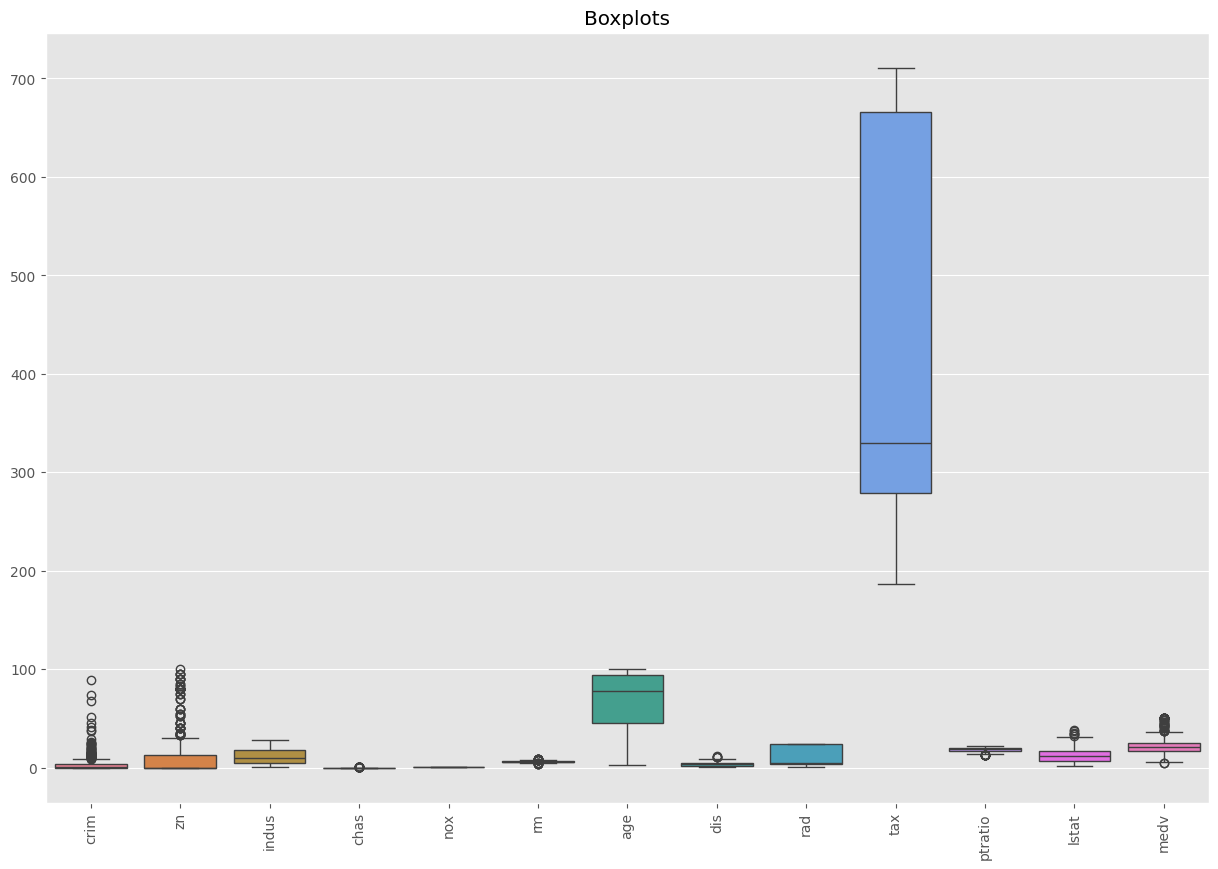

In [35]:
ipp.plot_outliers(df)

### Need to add to Backend

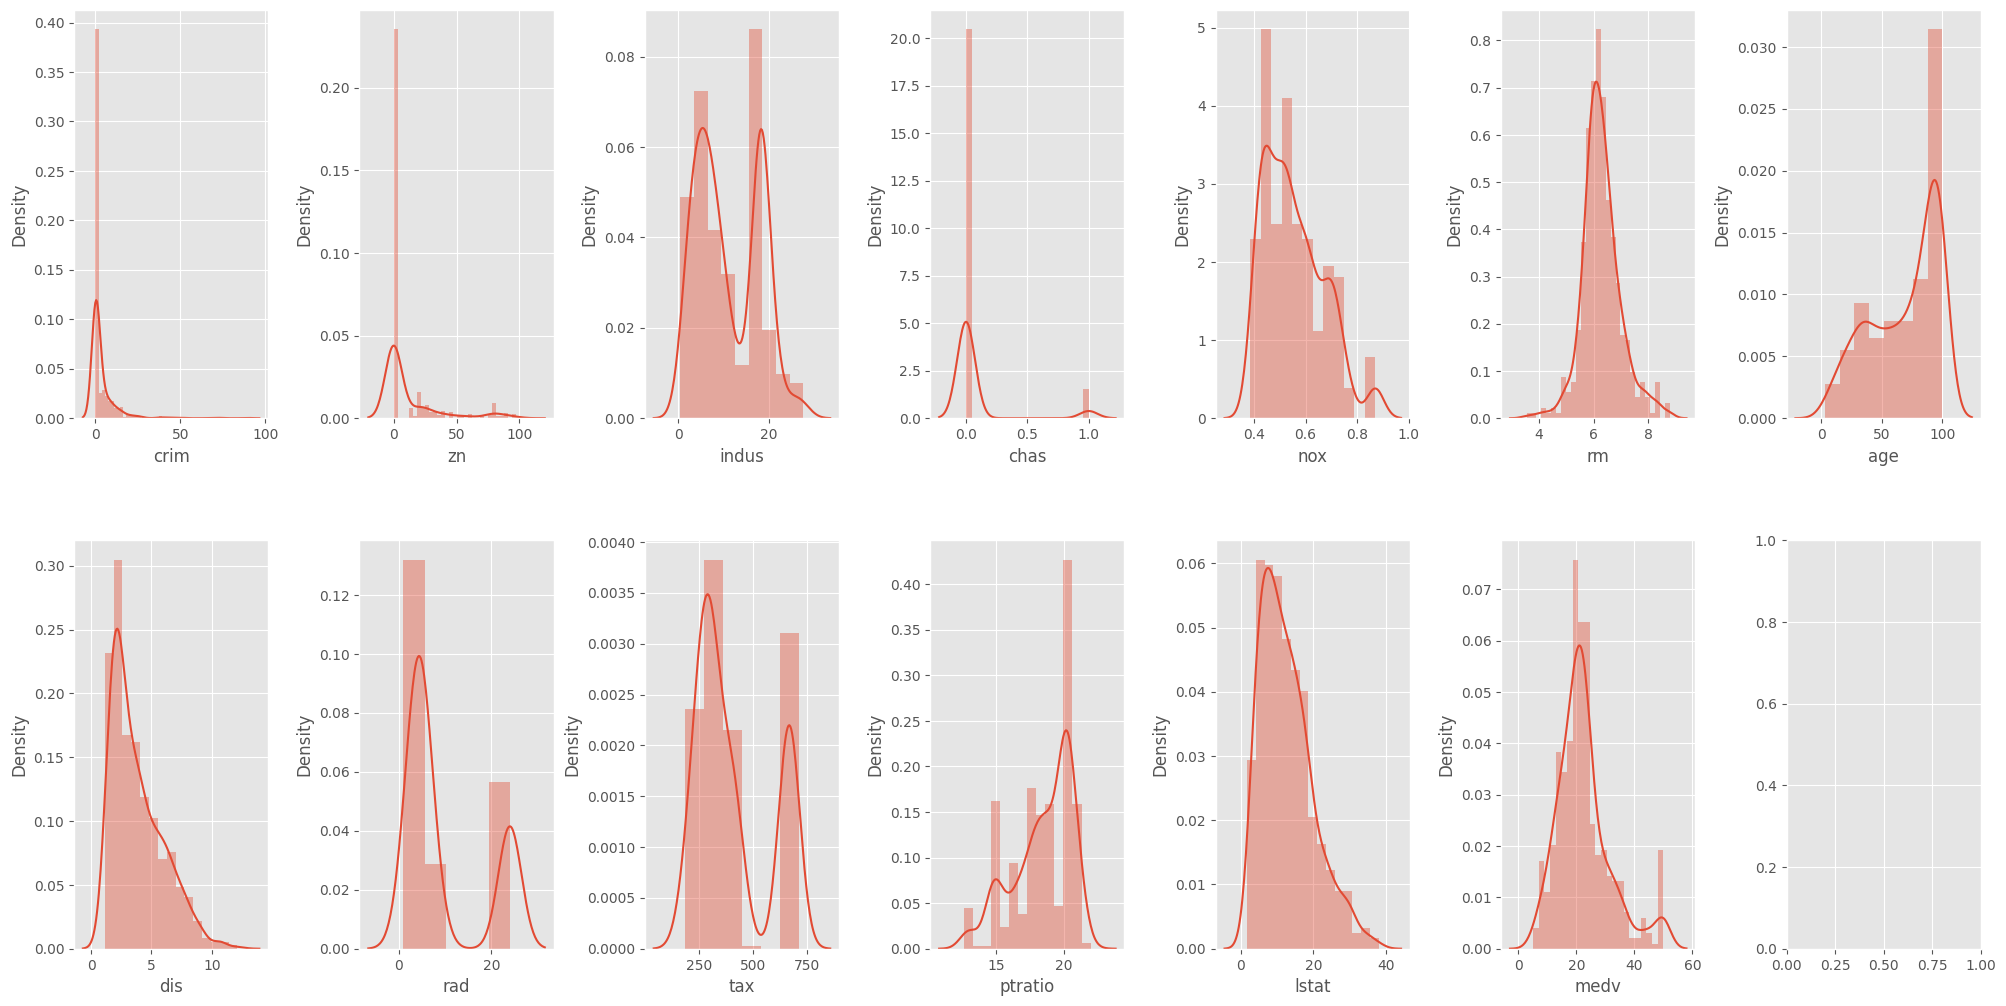

In [36]:
fig, axs = ipp.plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col, value in df.items() :
    ipp.sns.distplot(value, ax=axs[index])
    index += 1
ipp.plt. tight_layout (pad=0.5, w_pad=0.7, h_pad=5.0)

### NEED to ad this box plot to all features to show outliers

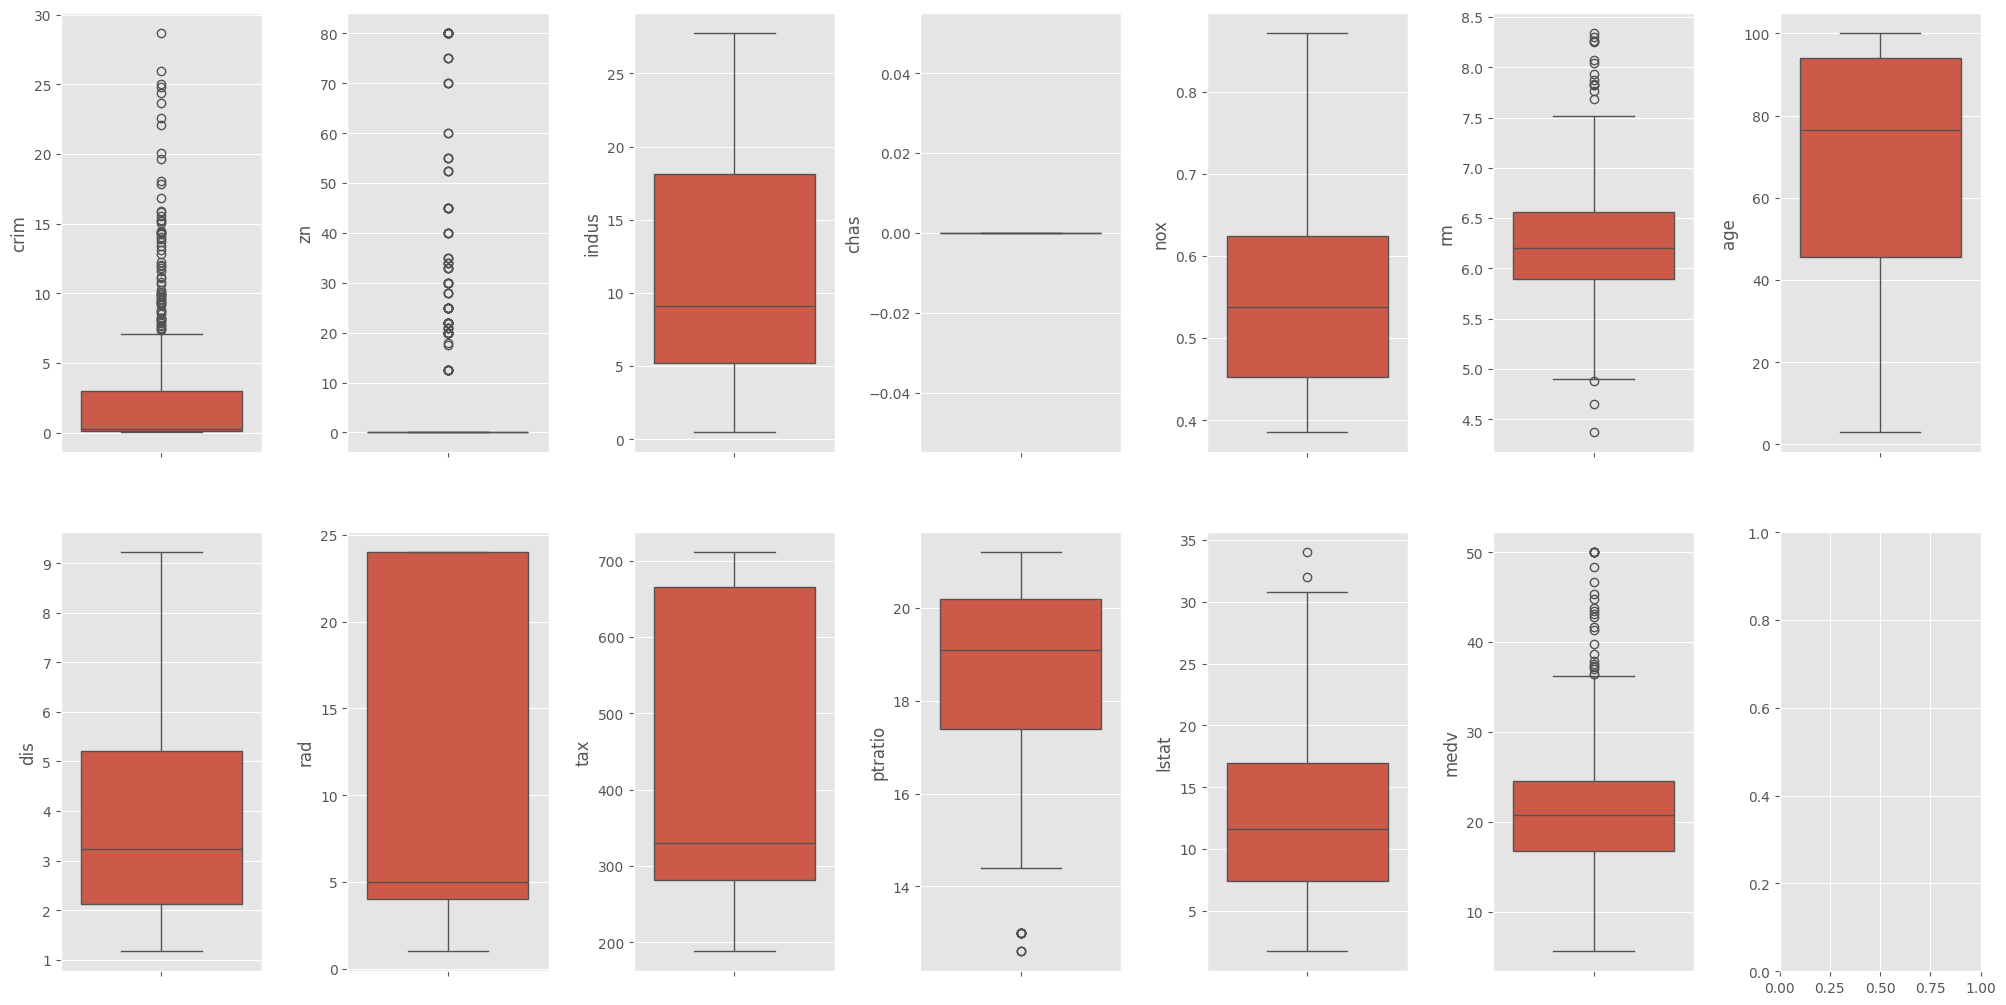

In [37]:
#box plot to all features to show outliers
fig, axs = ipp.plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for col, value in data.items():
    ipp.sns.boxplot(y=col, data=data, ax=axs[index])
    index += 1
ipp.plt.tight_layout (pad=0.5, w_pad=0.7, h_pad=5.0)

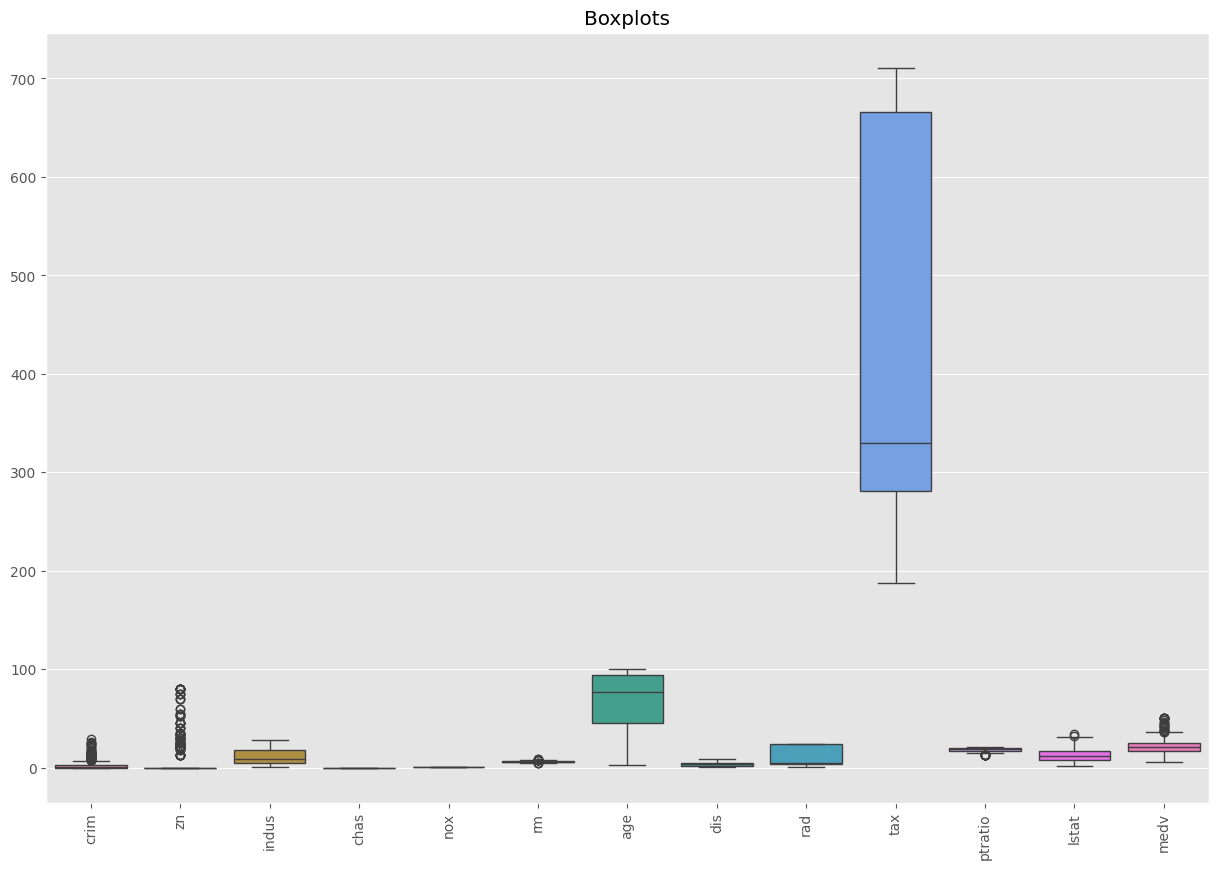

In [38]:
ipp.plot_outliers(data)

In [39]:
x = interModelWork(data,'sd3',compModel,False)
print(x)
model_Eval = ipp.pd.concat([model_Eval,ipp.add_model_info(x)],ignore_index=True)
print(model_Eval)

GD is set to  False
Success
{'Threshold value': 0, 'Train': 0.7376388468546287, 'Test': 0.7872277748599275, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x312f05730>, 'Theta': None}
{'Linear_Model': {'Threshold value': 'sd3', 'Train': 0.7376388468546287, 'Test': 0.7872277748599275, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x312f05730>, 'Theta': None}}
Best Model:
Key: Linear_Model
Value: {'Threshold value': 'sd3', 'Train': 0.7376388468546287, 'Test': 0.7872277748599275, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x312f05730>, 'Theta': None}
{'Linear_Model': {'Threshold value': 'sd3', 'Train': 0.7376388468546287, 'Test': 0.7872277748599275, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x312f05730>, 'Theta': None}}
      Model  Train Score  Test Score
0  Original     0.739802    0.689397
1       sd3     0.737639    0.787228


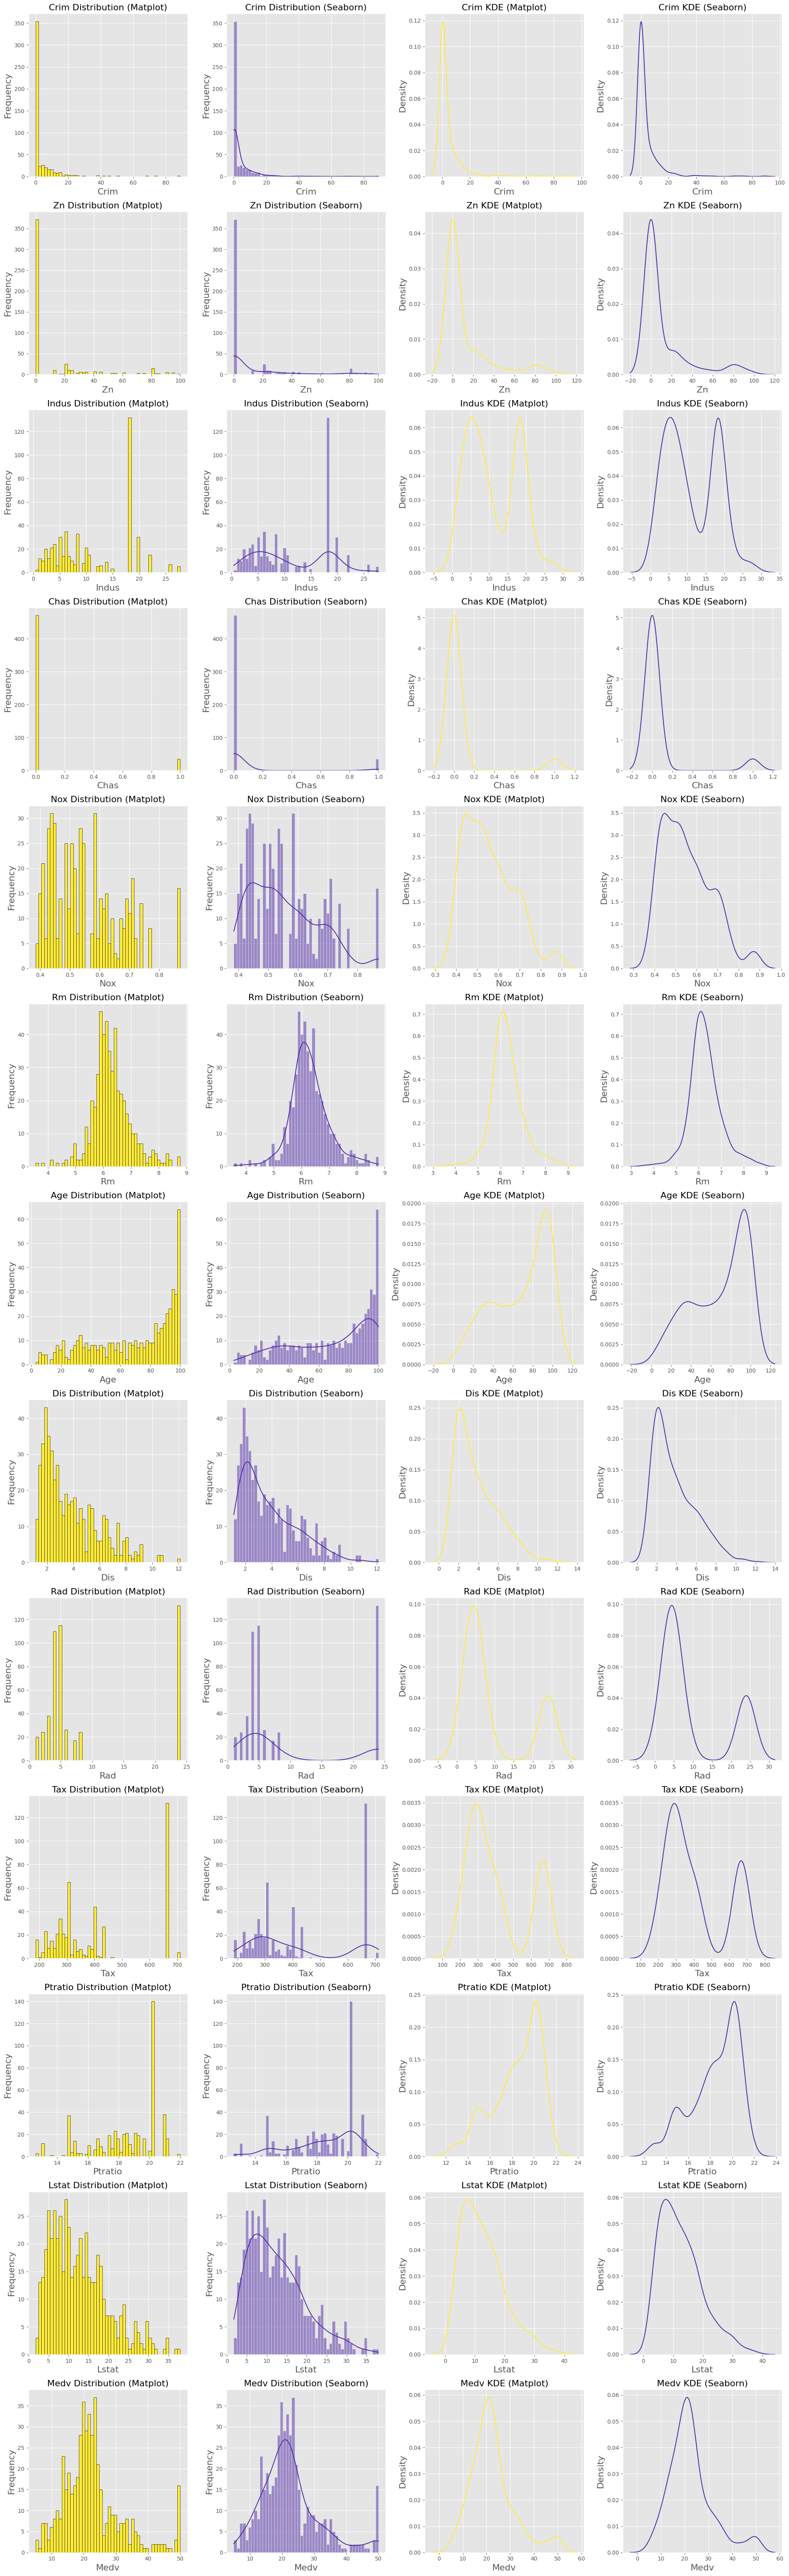

In [40]:
ipp.plot_all_numerical_columns(df)

In [41]:
corr_mat=data.corr()
corr_mat

crim        zn     indus  chas       nox        rm       age  \
crim     1.000000 -0.251348  0.523520   NaN  0.569795 -0.230036  0.439099   
zn      -0.251348  1.000000 -0.490184   NaN -0.489119  0.279295 -0.513772   
indus    0.523520 -0.490184  1.000000   NaN  0.745328 -0.378926  0.609581   
chas          NaN       NaN       NaN   NaN       NaN       NaN       NaN   
nox      0.569795 -0.489119  0.745328   NaN  1.000000 -0.291320  0.723347   
rm      -0.230036  0.279295 -0.378926   NaN -0.291320  1.000000 -0.206635   
age      0.439099 -0.513772  0.609581   NaN  0.723347 -0.206635  1.000000   
dis     -0.483735  0.607413 -0.686802   NaN -0.775233  0.186039 -0.726084   
rad      0.810953 -0.283157  0.579813   NaN  0.609623 -0.152461  0.426654   
tax      0.751569 -0.294879  0.717119   NaN  0.667432 -0.245837  0.492691   
ptratio  0.349927 -0.410910  0.384020   NaN  0.193702 -0.298978  0.263418   
lstat    0.587798 -0.384739  0.619506   NaN  0.627257 -0.584952  0.611677   
medv    -0.470666  0.320540 -0.514756   NaN -0.454757  0.693237 -0.406385   

              dis       rad       tax   ptratio     lstat      medv  
crim    -0.483735  0.810953  0.751569  0.349927  0.587798 -0.470666  
zn       0.607413 -0.283157 -0.294879 -0.410910 -0.384739  0.320540  
indus   -0.686802  0.579813  0.717119  0.384020  0.619506 -0.514756  
chas          NaN       NaN       NaN       NaN       NaN       NaN  
nox     -0.775233  0.609623  0.667432  0.193702  0.627257 -0.454757  
rm       0.186039 -0.152461 -0.245837 -0.298978 -0.584952  0.693237  
age     -0.726084  0.426654  0.492691  0.263418  0.611677 -0.406385  
dis      1.000000 -0.478616 -0.537870 -0.253408 -0.501474  0.273551  
rad     -0.478616  1.000000  0.905071  0.435293  0.502427 -0.409590  
tax     -0.537870  0.905071  1.000000  0.432431  0.567295 -0.501375  
ptratio -0.253408  0.435293  0.432431  1.000000  0.357236 -0.497126  
lstat   -0.501474  0.502427  0.567295  0.357236  1.000000 -0.755570  
medv     0.273551 -0.409590 -0.501375 -0.497126 -0.755570  1.000000

In [44]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [46]:
df

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
1    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
2    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
3    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
4    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
5    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio  lstat  medv  
1       15.3   4.98  24.0  
2       17.8   9.14  21.6  
3       17.8   4.03  34.7  
4       18.7   2.94  33.4  
5       18.7   5.33  36.2  
..       ...    ...   ...  
502     21.0   9.67  22.4  
503     21.0   9.08  20.6  
504     21.0   5.64  23.9  
505     21.0   6.48  22.0  
506     21.0   7.88  11.9  

[506 rows x 13 columns]

<class 'pandas.core.frame.DataFrame'>


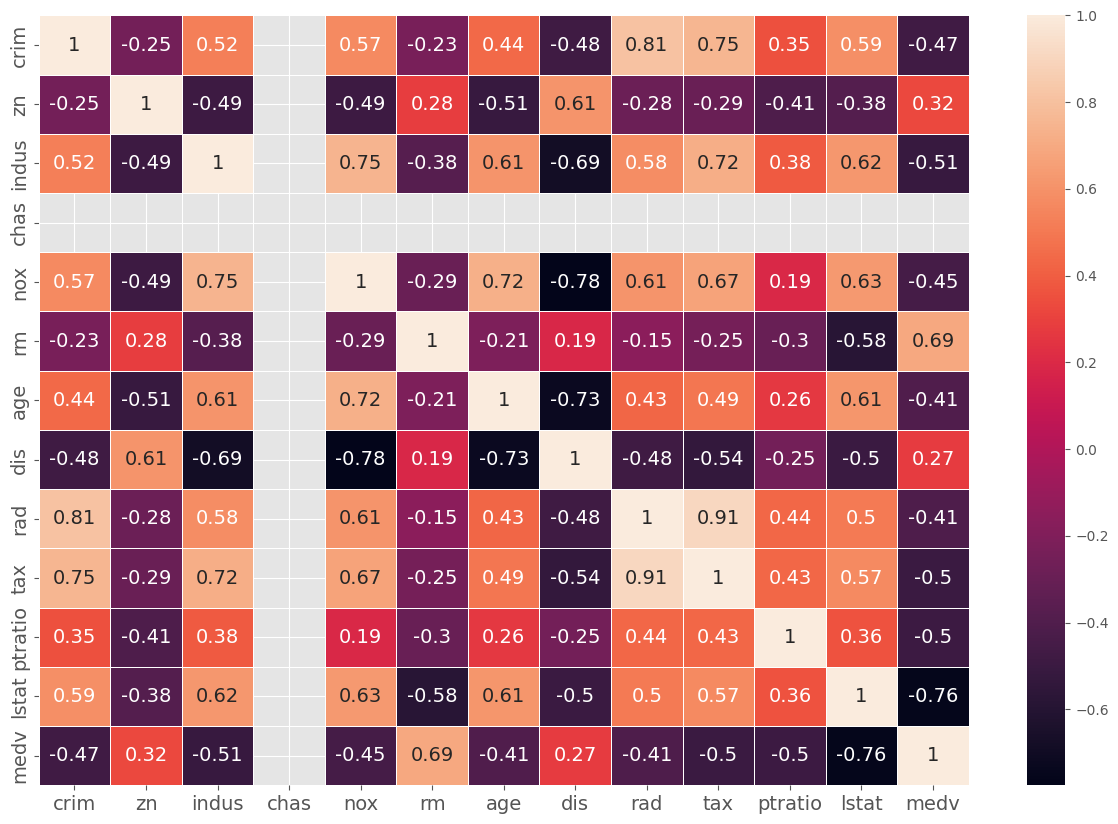

Plot done


In [45]:
correlation_matrix = corr_mat
print(type(corr_mat))
ipp.corrplot(corr_mat)

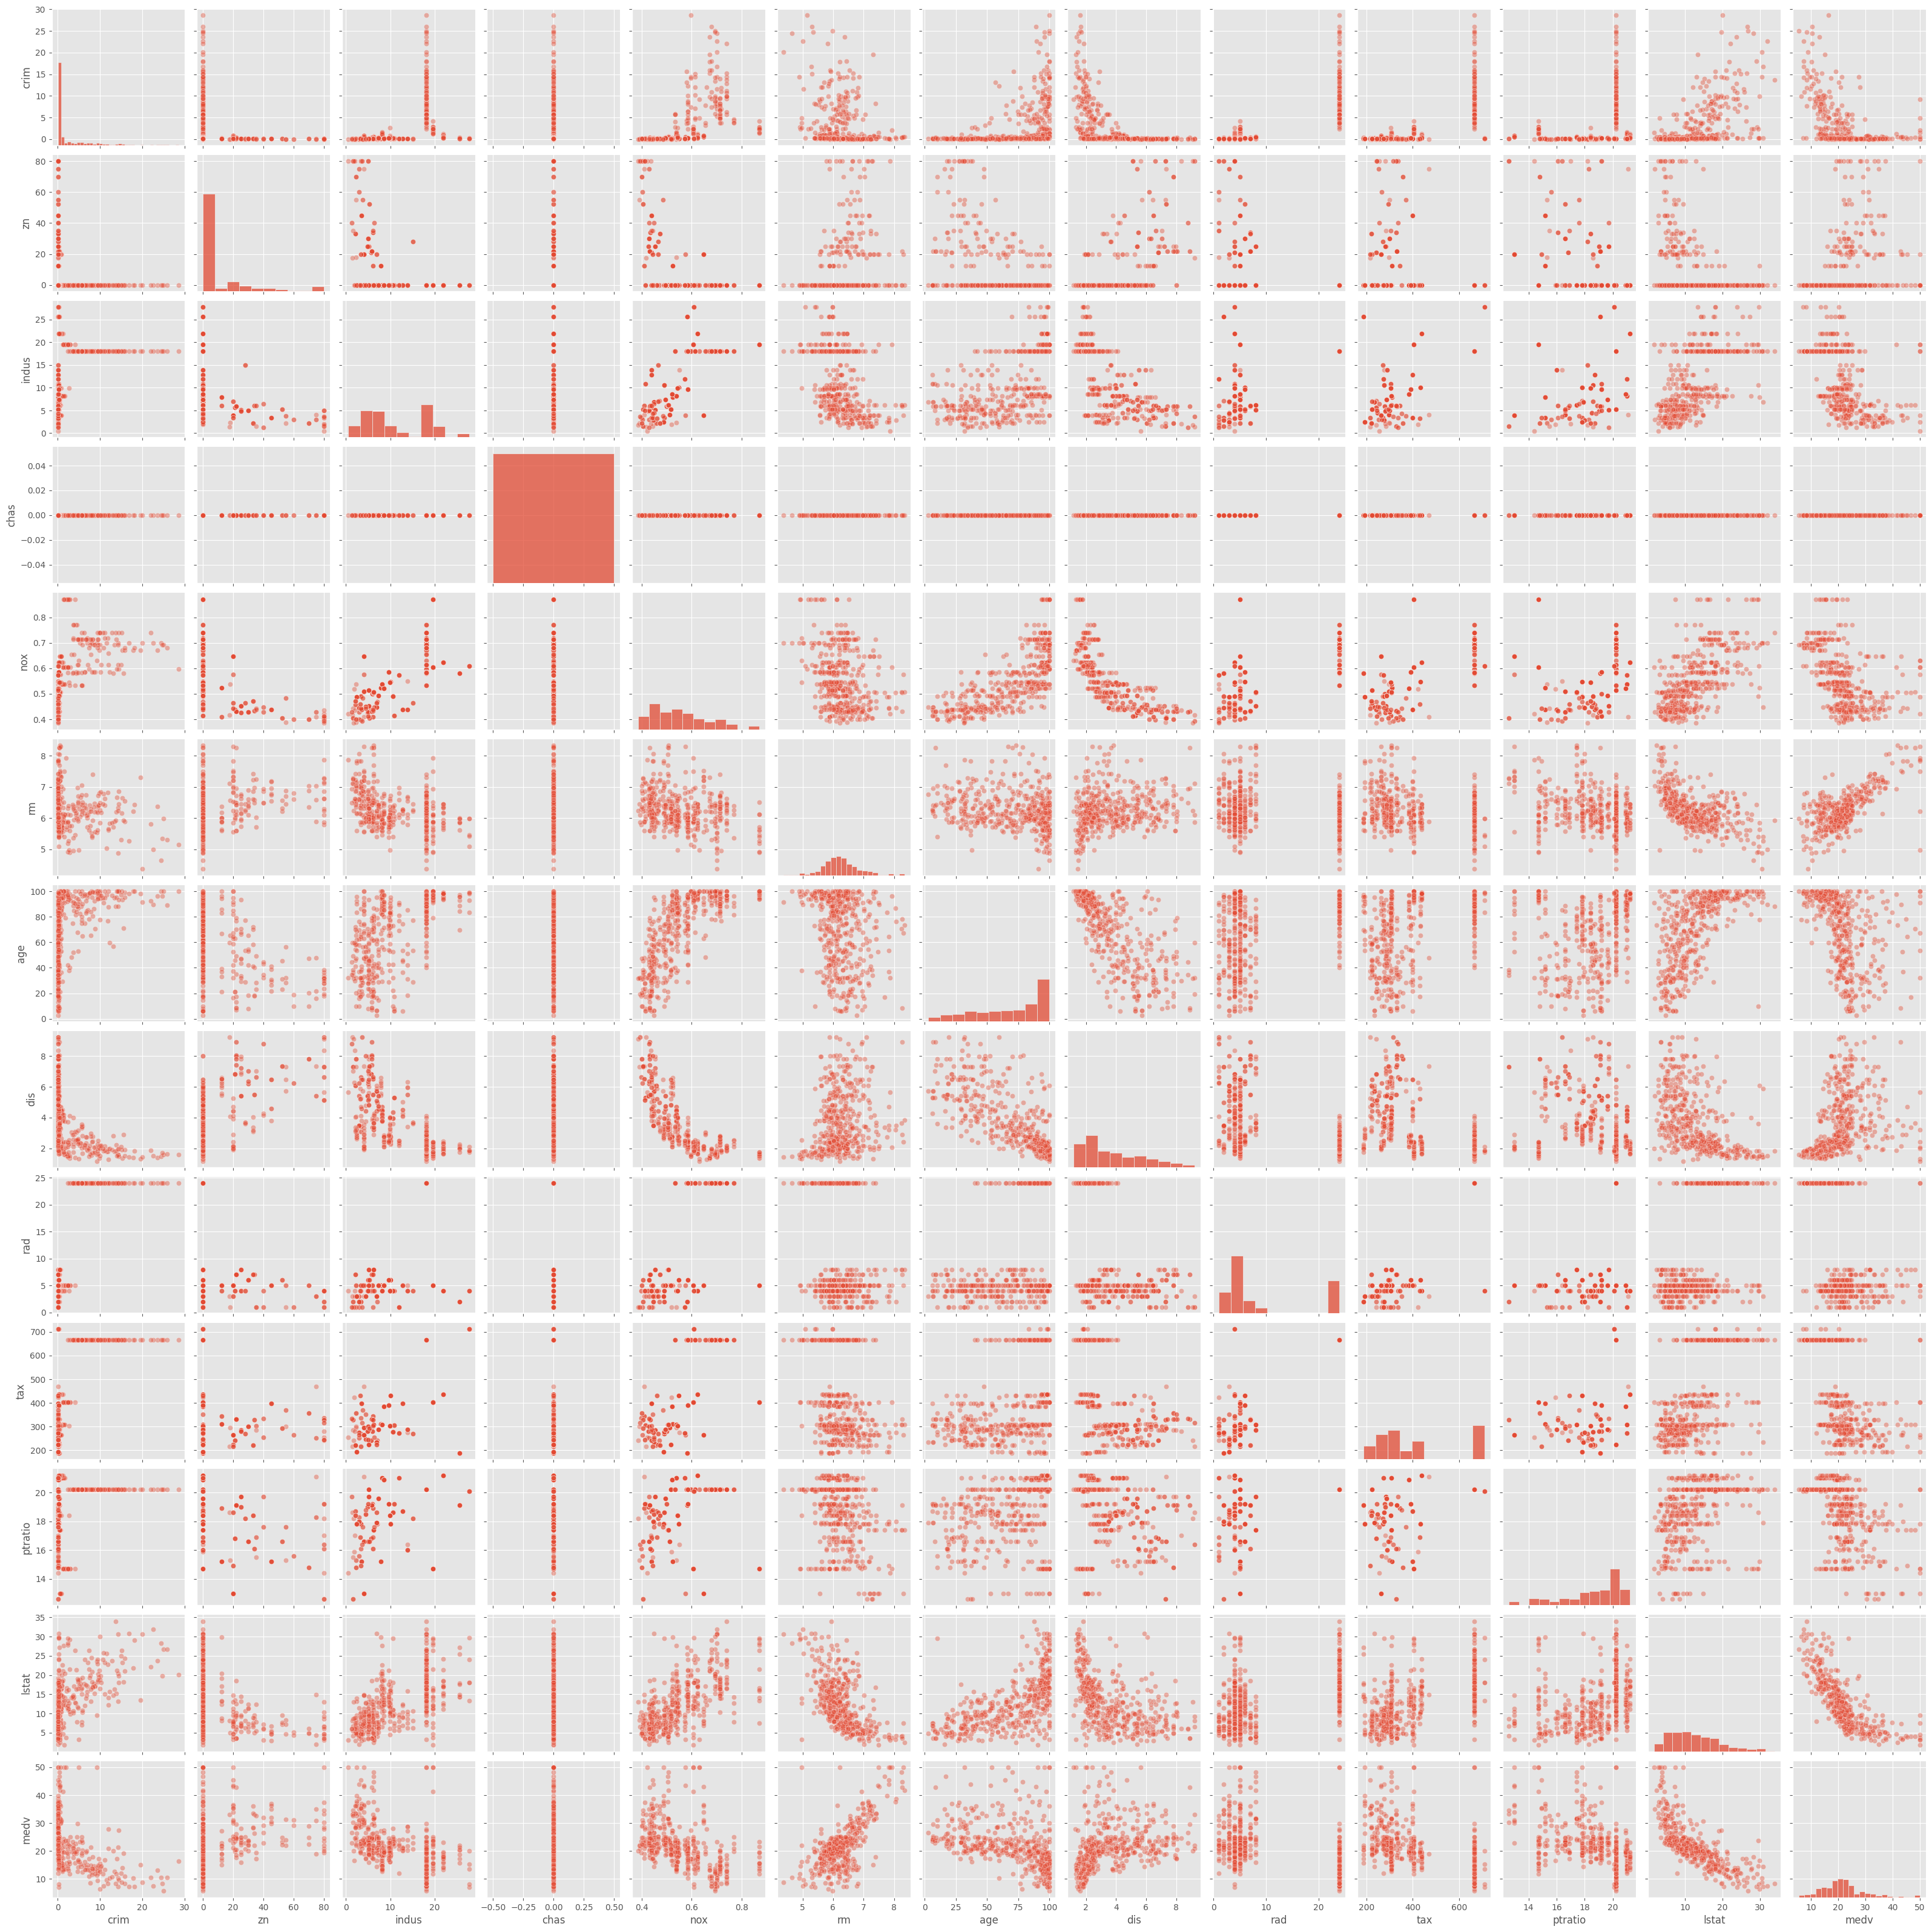

In [24]:
ipp.sns.pairplot(data, kind='scatter',plot_kws={'alpha': 0.4})

# <center>END OF SECTION - 1</center>

## Feature scaling 

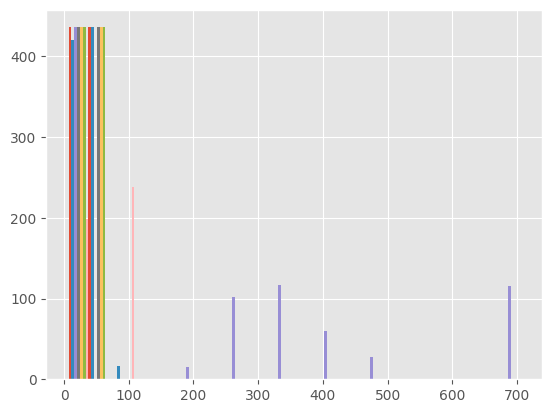

In [25]:
# df_dropped = data.drop(columns=[predictor_variable])
ipp.plt.hist(data.values, label='Before Scaling')
ipp.plt.show()

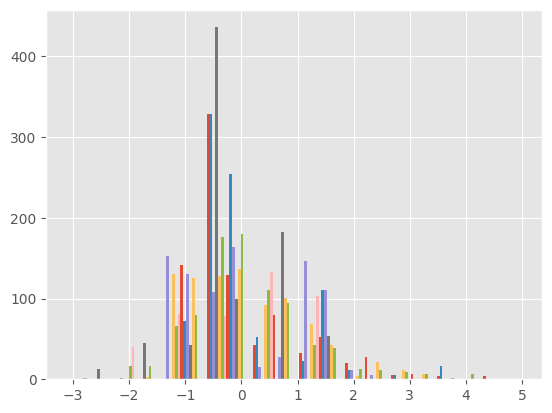

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler ()
x = scaler.fit_transform(data)
df_scaled = ipp.pd.DataFrame(x, columns=data.columns)
ipp.plt.hist(df_scaled, label='After Scaling')
ipp.plt.show()

In [27]:
df_scaled[predictor_variable] = data[predictor_variable].values
x = interModelWork(df_scaled,'AF_Stand',compModel)
print(x)
model_Eval = ipp.pd.concat([model_Eval,ipp.add_model_info(x)],ignore_index=True)
print(model_Eval)
data = df_scaled

GD is set to  False
Success
{'Threshold value': 0, 'Train': 0.7376388468546287, 'Test': 0.7872277748599276, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x31380d940>, 'Theta': None}
{'Linear_Model': {'Threshold value': 'AF_Stand', 'Train': 0.7376388468546287, 'Test': 0.7872277748599276, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x31380d940>, 'Theta': None}}
Best Model:
Key: Linear_Model
Value: {'Threshold value': 'AF_Stand', 'Train': 0.7376388468546287, 'Test': 0.7872277748599276, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x31380d940>, 'Theta': None}
{'Linear_Model': {'Threshold value': 'AF_Stand', 'Train': 0.7376388468546287, 'Test': 0.7872277748599276, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x31380d940>, 'Theta': None}}
      Model  Train Score  Test Score
0  Original     0.739802    0.689397
1       sd3     0.7376

## Splitting dataset into train and test data

### Model with Corr Model 

In [28]:
compModel = {}
threshold_list = [0.0,0.3,0.4,0.5,0.6,0.7]
for i in threshold_list:
    print(i)
    model_dict = {}
    model_dict = ipp.corr_LinearRegModel(i, data, predictor_variable)
    compModel.update({f"Model_{i}": model_dict["Linear_Model"]})

0.0
Success
0.3
Success
0.4
Success
0.5
Success
0.6
Success
0.7
Success


## Model eval

In [29]:
model_Eval = ipp.pd.concat([model_Eval,ipp.add_model_info(compModel)],ignore_index=True)
ipp.filter_def(compModel)
model_Eval

Best Model:
Key: Model_0.3
Value: {'Threshold value': 0.3, 'Train': 0.7376388468546287, 'Test': 0.7872277748599277, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x3135767b0>, 'Theta': None}


Model  Train Score  Test Score
0  Original     0.739802    0.689397
1       sd3     0.737639    0.787228
2  AF_Stand     0.737639    0.787228
3       0.0     0.737639    0.787228
4       0.3     0.737639    0.787228
5       0.4     0.737639    0.787228
6       0.5     0.705965    0.738471
7       0.6     0.705965    0.738471
8       0.7     0.625349    0.592438

## Handling the skewness

In [30]:
skewness_values = data.skew()
# print(skewness_values)
approx_symmetry, slightly_skewed, highly_skewed = ipp.segregate_skewness(skewness_values)

For skewness values between -0.5 and 0.5, the data exhibit approximate symmetry:
['indus', 'chas']

Skewness values within the range of -1 and -0.5 (negative skewed) or 0.5 and 1 (positive skewed) indicate slightly skewed data distributions:
['nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'lstat']

Data with skewness values less than -1 (negative skewed) or greater than 1 (positive skewed) are considered highly skewed:
['crim', 'zn', 'rad', 'medv']


### slightly_skewed Tranformation

In [31]:
data = ipp.apply_log_transformation(data.copy(), slightly_skewed)
# slightly_skewed Model
x = interModelWork(data,'slightly_skewed',compModel)
print(x)
model_Eval = ipp.pd.concat([model_Eval,ipp.add_model_info(x)],ignore_index=True)
print(model_Eval)

GD is set to  False
Success
{'Threshold value': 0, 'Train': 0.7286458373147837, 'Test': 0.7754248340585641, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x16dc41f70>, 'Theta': None}
{'Model_0.3': {'Threshold value': 0.3, 'Train': 0.7376388468546287, 'Test': 0.7872277748599277, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x3135767b0>, 'Theta': None}, 'Linear_Model': {'Threshold value': 'slightly_skewed', 'Train': 0.7286458373147837, 'Test': 0.7754248340585641, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x16dc41f70>, 'Theta': None}}
Best Model:
Key: Model_0.3
Value: {'Threshold value': 0.3, 'Train': 0.7376388468546287, 'Test': 0.7872277748599277, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x3135767b0>, 'Theta': None}
{'Linear_Model': {'Threshold value': 'slightly_skewed', 'Train': 0.7286458373147837, 'Test': 0.775424834058564

### Highly_skewed Tranformation

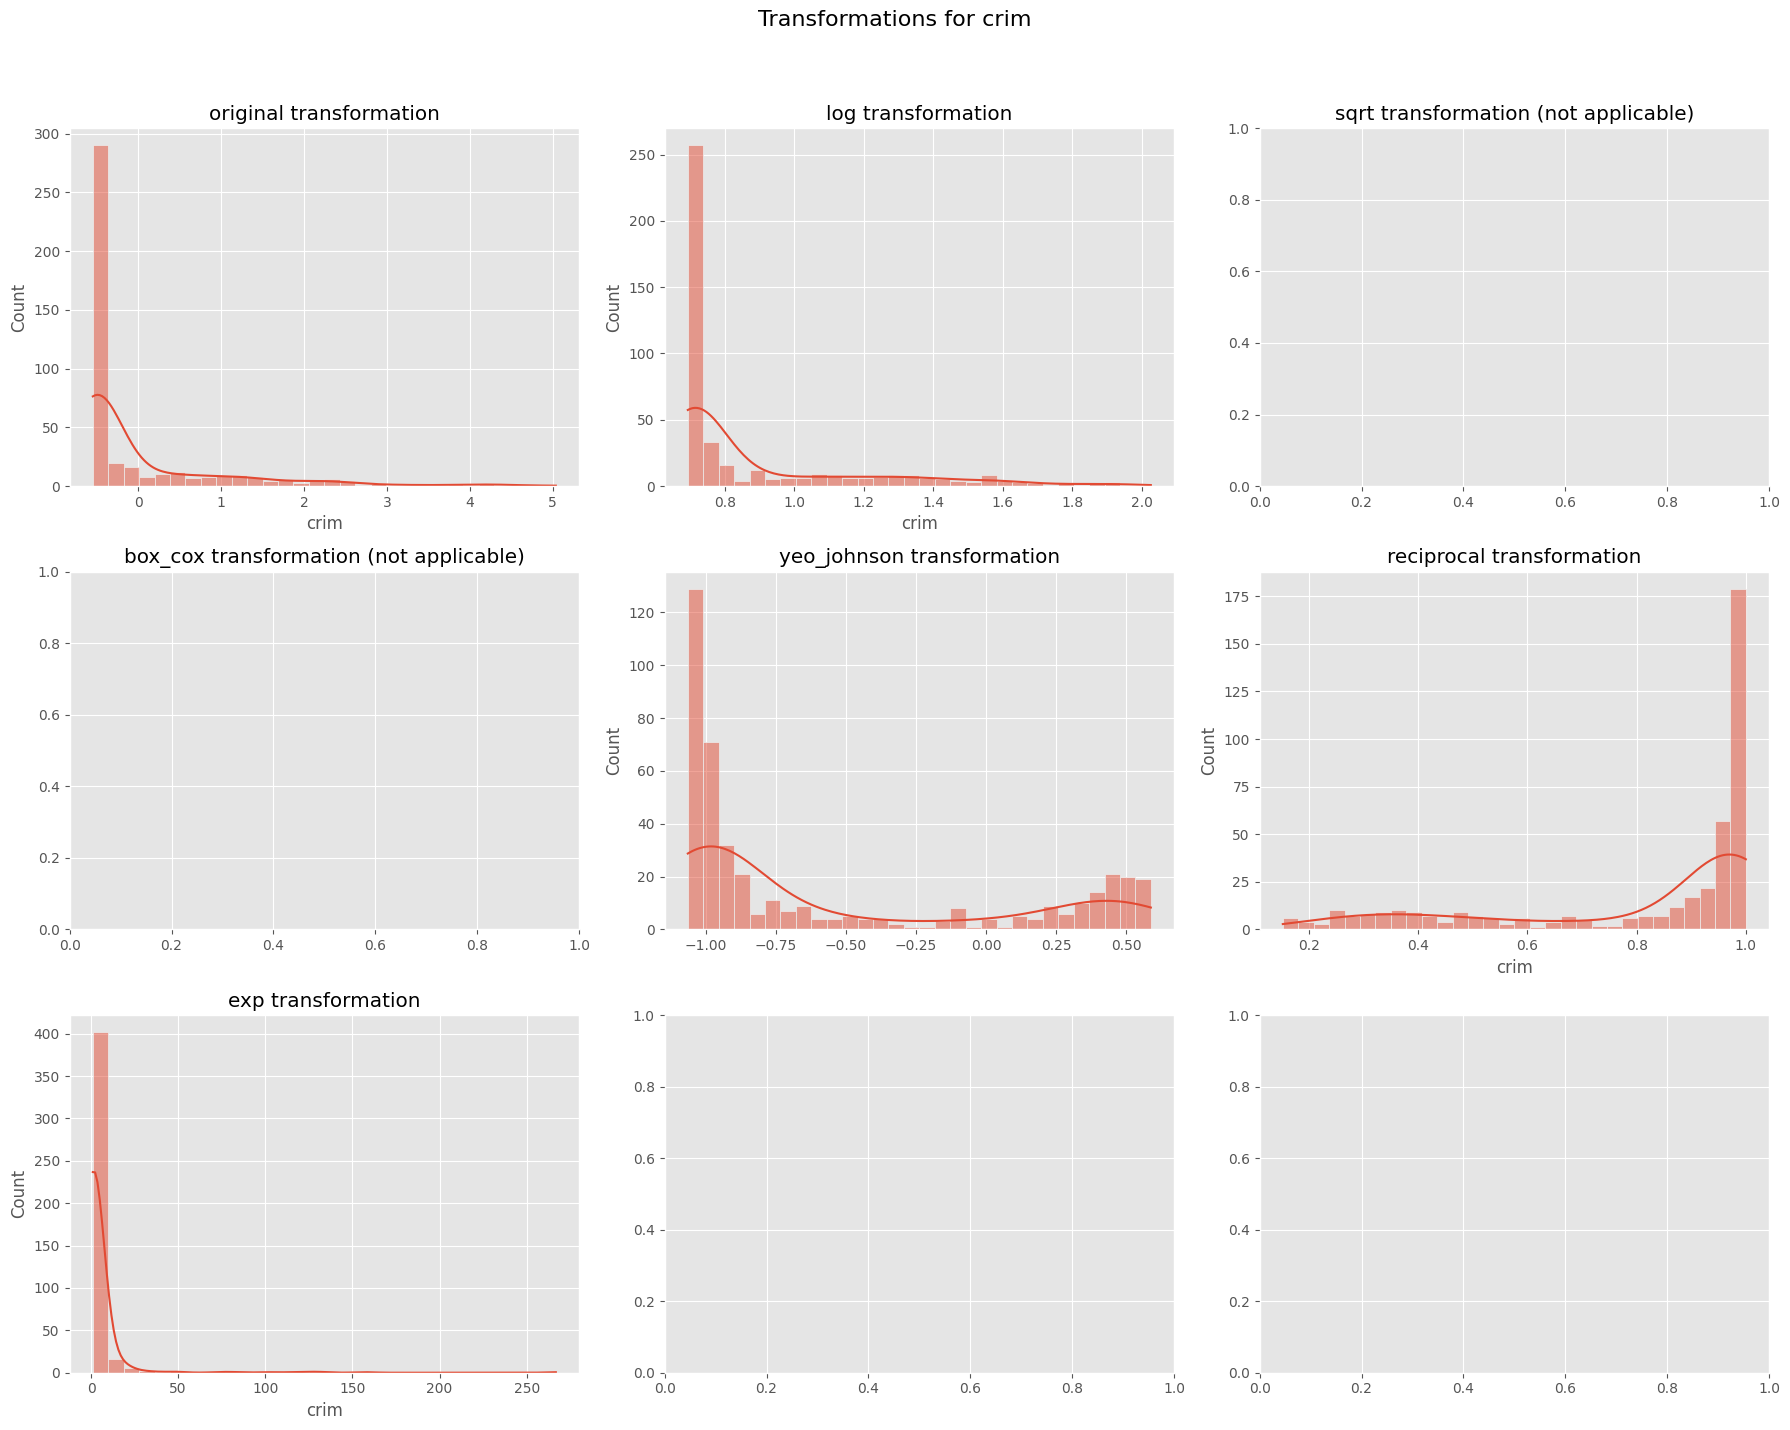

Skewness for different transformations of crim:
 {'original': 2.3897722439510205, 'log': 1.7502534892243256, 'yeo_johnson': 0.8853544440527389, 'reciprocal': -1.1356753707037244, 'exp': 8.634170148811448}
Replaced crim with yeo_johnson transformation. Renamed to crim_yeo_johnson.



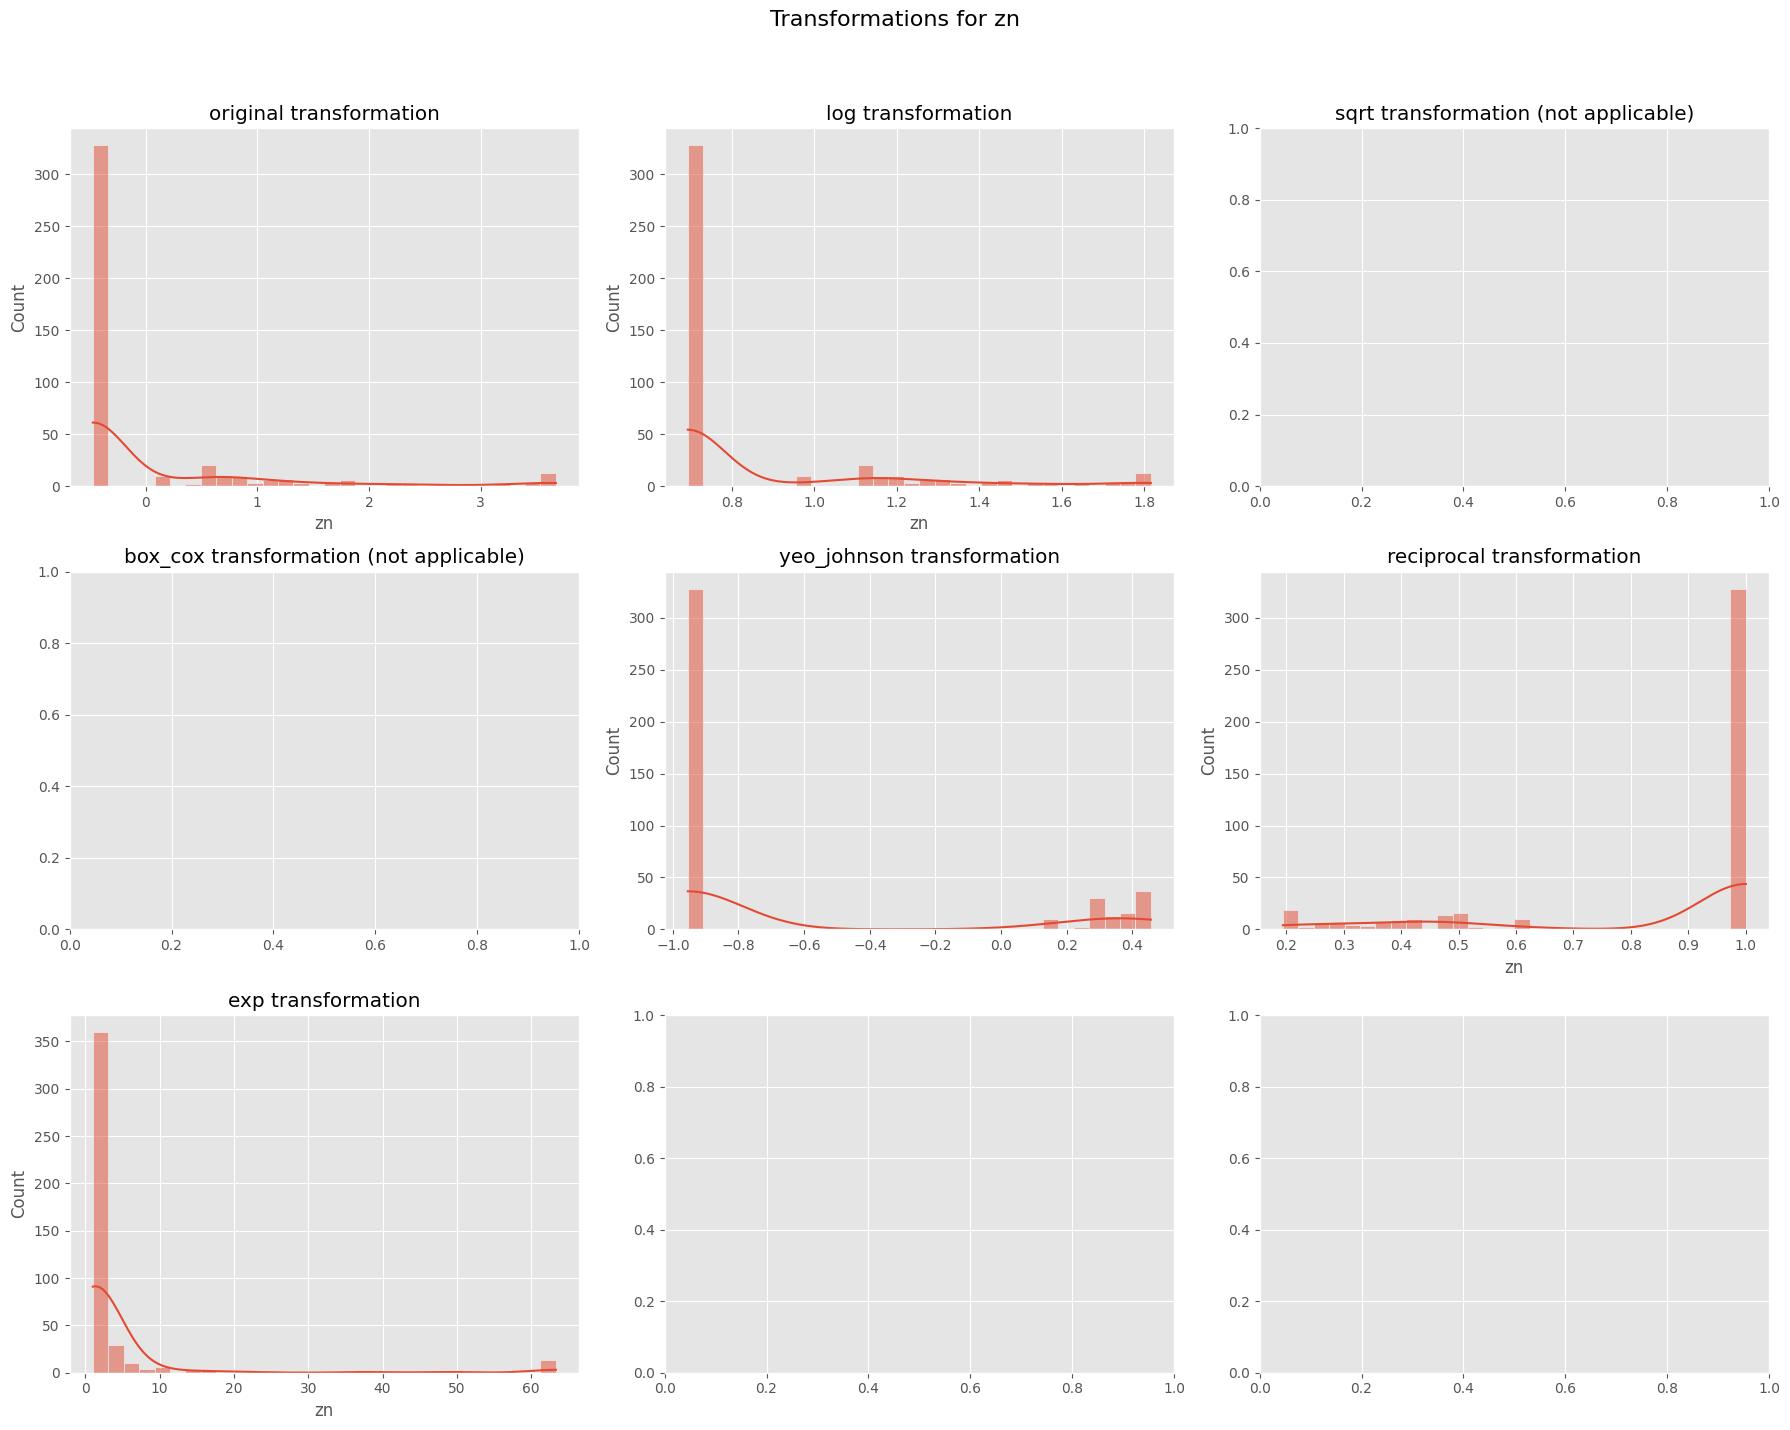

Skewness for different transformations of zn:
 {'original': 2.380036776871874, 'log': 1.8683050293095902, 'yeo_johnson': 1.1943737302760682, 'reciprocal': -1.3529780318486844, 'exp': 4.342134884210303}
Replaced zn with yeo_johnson transformation. Renamed to zn_yeo_johnson.



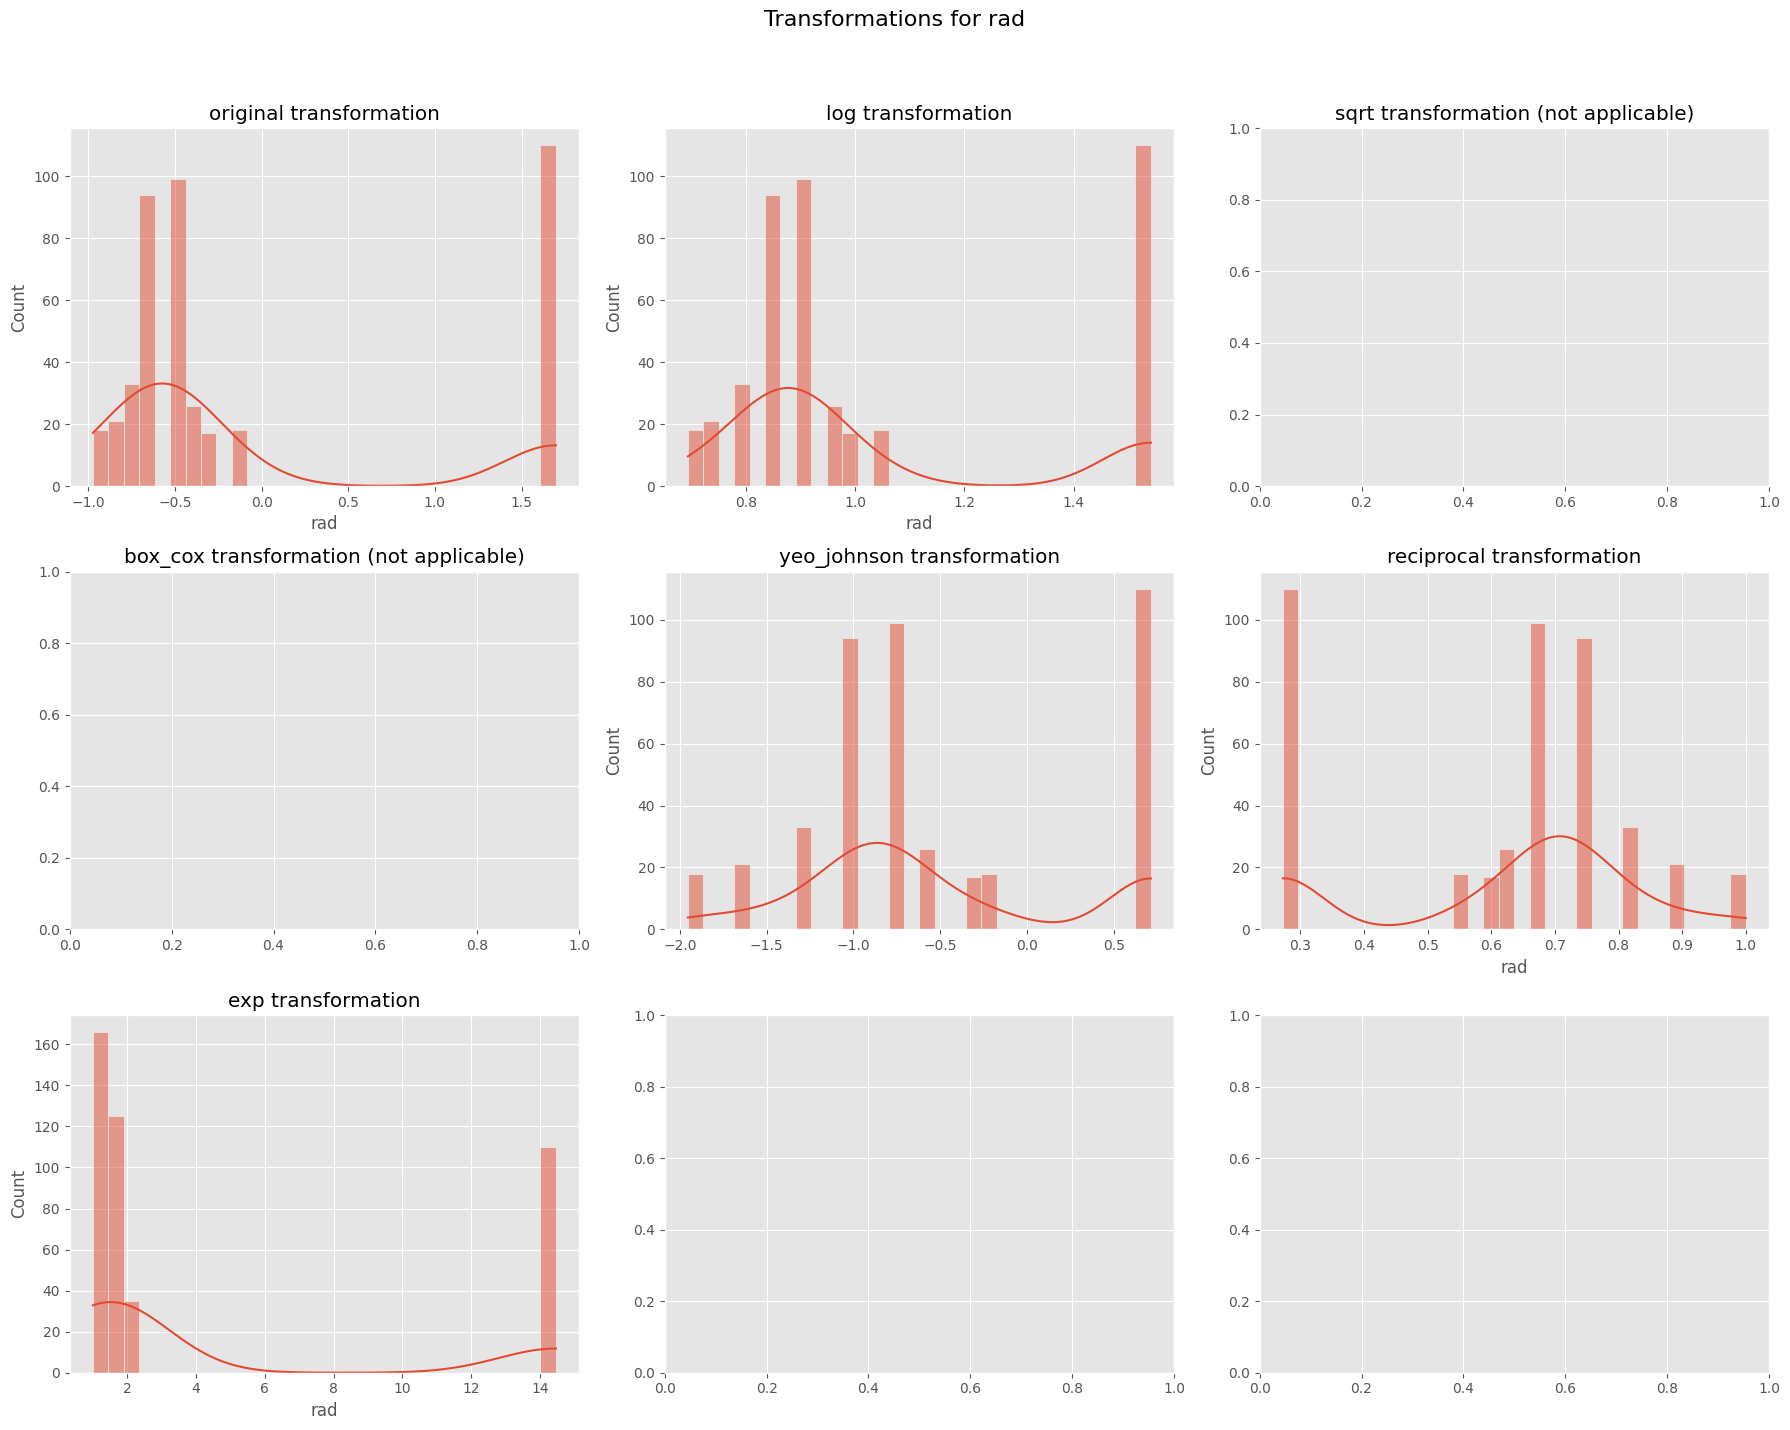

Skewness for different transformations of rad:
 {'original': 1.0536312273377582, 'log': 0.9634484368563289, 'yeo_johnson': 0.43969866082312703, 'reciprocal': -0.525500538405839, 'exp': 1.1377524884187449}
Replaced rad with yeo_johnson transformation. Renamed to rad_yeo_johnson.



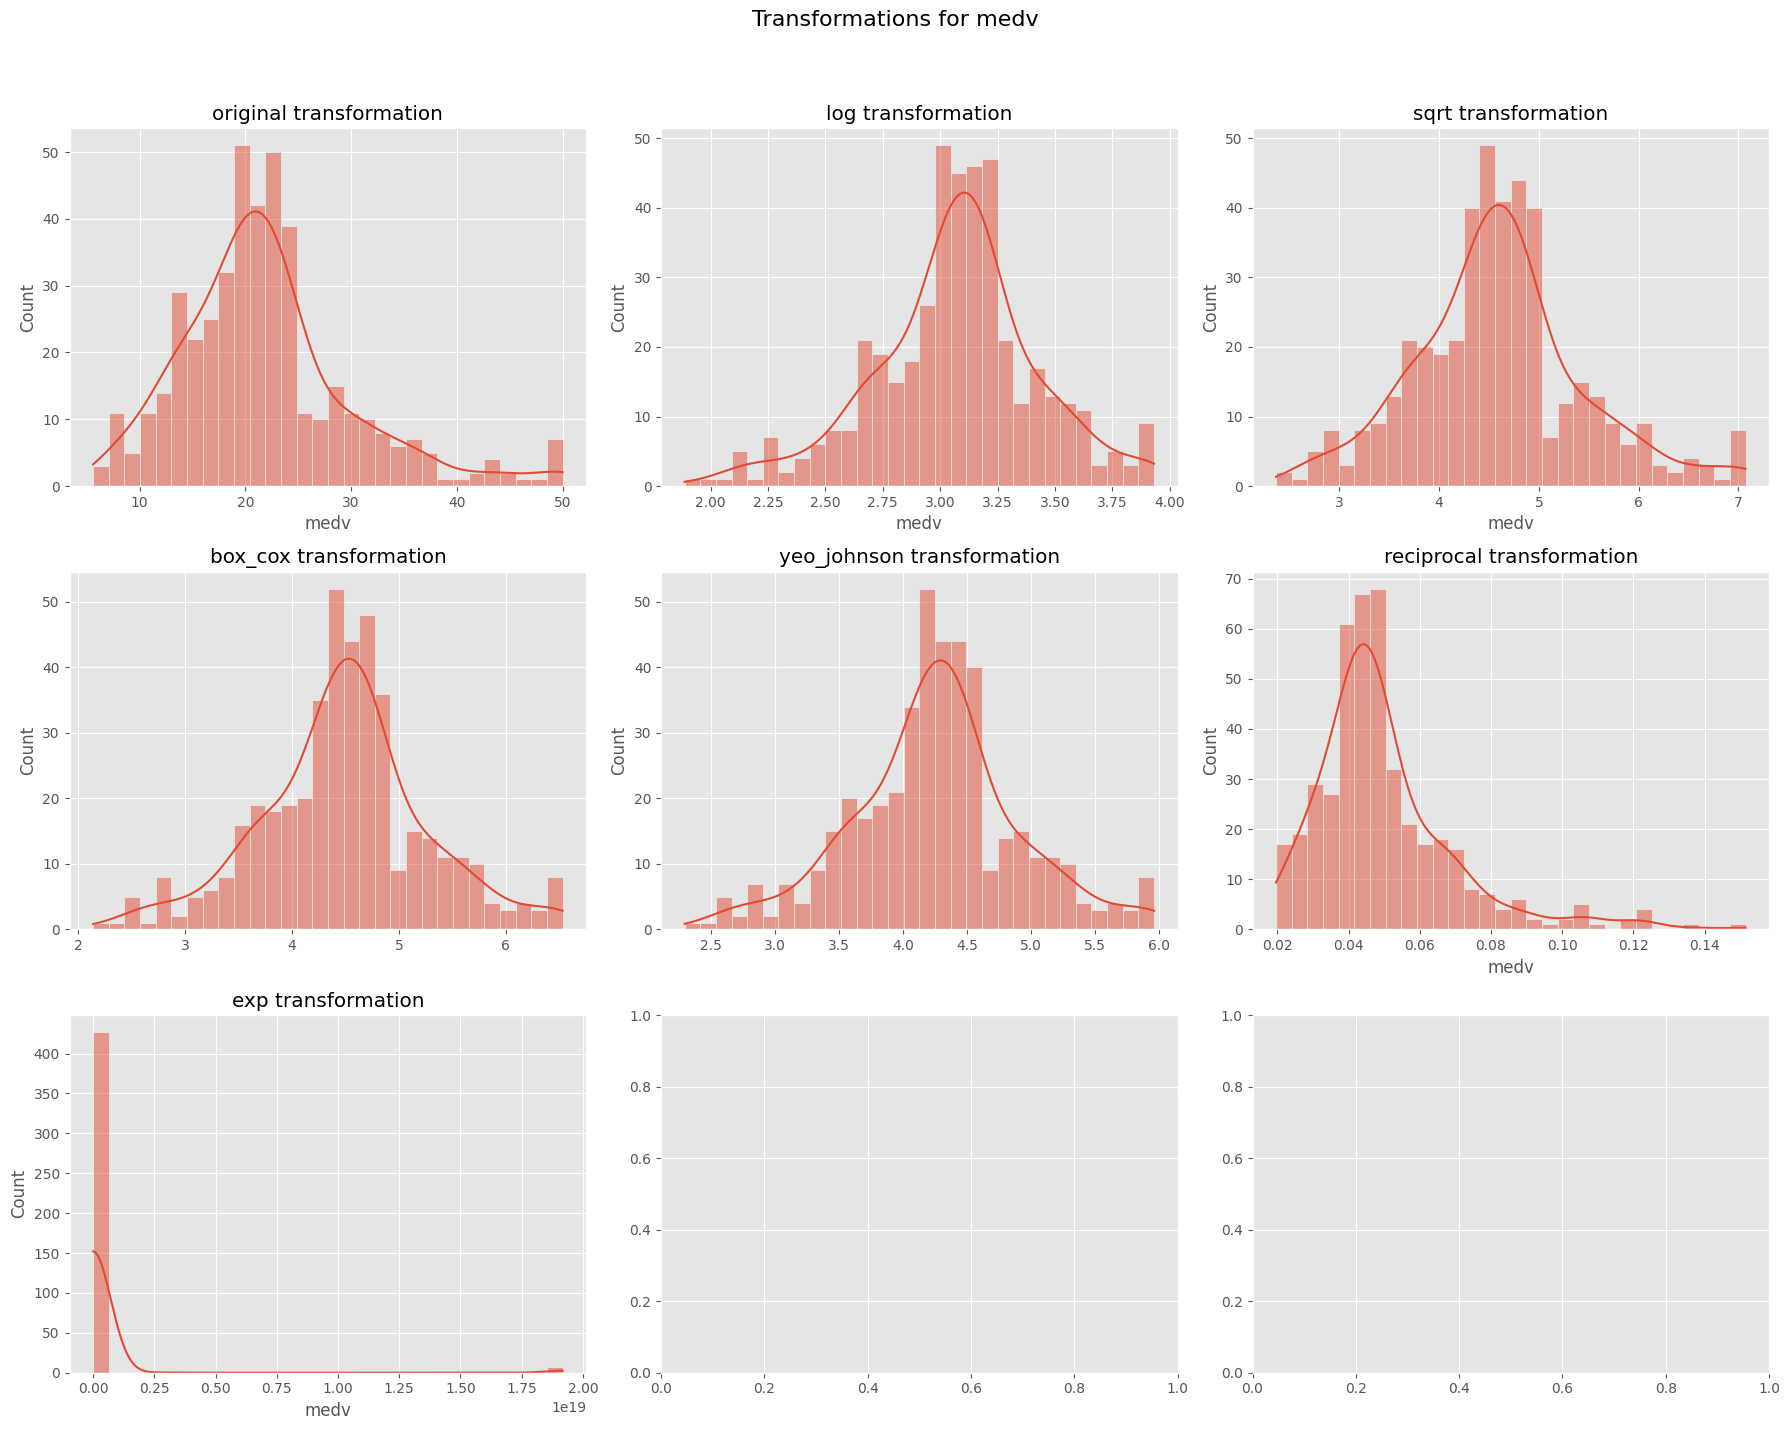

Skewness for different transformations of medv:
 {'original': 1.0658025506086903, 'log': -0.2606518744483409, 'sqrt': 0.38348774429871596, 'box_cox': 0.016831380035201453, 'yeo_johnson': 0.012637089937949703, 'reciprocal': 1.7062962614079111, 'exp': 7.674323614778956}
Replaced medv with yeo_johnson transformation. Renamed to medv_yeo_johnson.

GD is set to  False
Success
{'Threshold value': 0, 'Train': 0.7651612344743223, 'Test': 0.7927343293708478, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x315319f70>, 'Theta': None}
{'Model_0.3': {'Threshold value': 0.3, 'Train': 0.7376388468546287, 'Test': 0.7872277748599277, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x3135767b0>, 'Theta': None}, 'Linear_Model': {'Threshold value': 'Highly_skewed', 'Train': 0.7651612344743223, 'Test': 0.7927343293708478, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x315319f70>, 'Theta': Non

In [32]:
data = ipp.choose_best_transformation(data.copy(), highly_skewed)
# Highly skew model 
x = interModelWork(data,'Highly_skewed',compModel)
print(x)
model_Eval = ipp.pd.concat([model_Eval,ipp.add_model_info(x)],ignore_index=True)
print(model_Eval)

# Need to loop once more to clear off the skwness

In [33]:
skewness_values = data.skew()
approx_symmetry, slightly_skewed, highly_skewed = ipp.segregate_skewness(skewness_values)

For skewness values between -0.5 and 0.5, the data exhibit approximate symmetry:
['indus', 'chas', 'exp_age', 'exp_ptratio', 'rad_yeo_johnson', 'medv_yeo_johnson']

Skewness values within the range of -1 and -0.5 (negative skewed) or 0.5 and 1 (positive skewed) indicate slightly skewed data distributions:
['nox', 'rm', 'dis', 'tax', 'lstat', 'crim_yeo_johnson']

Data with skewness values less than -1 (negative skewed) or greater than 1 (positive skewed) are considered highly skewed:
['zn_yeo_johnson']


In [34]:
ipp.filter_def(compModel)

Best Model:
Key: Linear_Model
Value: {'Threshold value': 'Highly_skewed', 'Train': 0.7651612344743223, 'Test': 0.7927343293708478, 'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x315319f70>, 'Theta': None}


{'Linear_Model': {'Threshold value': 'Highly_skewed',
  'Train': 0.7651612344743223,
  'Test': 0.7927343293708478,
  'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x315319f70>,
  'Theta': None}}

In [35]:
compModel

{'Linear_Model': {'Threshold value': 'Highly_skewed',
  'Train': 0.7651612344743223,
  'Test': 0.7927343293708478,
  'OLS_model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x315319f70>,
  'Theta': None}}

# <center>END OF SECTION - 2 </center>

## After the PREPROCESSING
### Checking for the Assumption of linear Regression
#### Assumption of Homoscadasticity

In [36]:
X_train,X_test,y_train,y_test,y_pred = ipp.extract_info_model(compModel)
print("X_train shape:", X_test.shape)
print("y_train shape:", y_pred.shape)

X_train shape: (348, 12)
y_train shape: (348,)


In [37]:
# Perform het_goldfeldquandt test
test_statistic, p_value, _ = ipp.sm.stats.het_goldfeldquandt(y_train, X_train)

# Print the test results
print("Goldfeld-Quandt test statistic:", test_statistic)
print("Goldfeld-Quandt p-value:", p_value)

Goldfeld-Quandt test statistic: 1.4229697826048349
Goldfeld-Quandt p-value: 0.012687693478966313


## To interpret this output:
### Null hypothesis : no heteroscadasticity
### Alternate hypothesis : there is heteroscadasticity.
### since our p value is greater than 0.05 we reject null hypothesis there is no heteroscadasticity in the model

#### If the p-value is less than a chosen significance level (e.g., 0.05), you would reject the null hypothesis of homoscedasticity. In your case, the p-value is approximately 0.2579, which is greater than 0.05. Therefore, you may fail to reject the null hypothesis.

#### The F-statistic helps to assess the strength of evidence against the null hypothesis. A larger F-statistic suggests stronger evidence against the null hypothesis.

#### The qualitative interpretation ('increasing' in your case) indicates the direction of the detected heteroscedasticity. In your case, 'increasing' suggests that the variance of the errors increases as the values of the predictor variable increase.

In [38]:
# mc = ipp.pd.Series([ipp.variance_inflation_factor(x.values, i) 
#                for i in range(x.shape[1])], 
#               index=x.columns)
# mc=round(mc,2)
# mc

In [39]:
fitted_values,residuals = analysee_model(compModel)

NameError: name 'analysee_model' is not defined

It looks like the Breusch-Pagan test and White test both indicate evidence of heteroscedasticity in your linear model. Here's a breakdown of the results:

- **Breusch-Pagan Test**:
  - Test Statistic: 83.4203019606528
  - P-value: 9.151178110688592e-13
  - Interpretation: The null hypothesis of the Breusch-Pagan test is that the variance of the errors is constant (homoscedasticity). With such a low p-value (close to zero), we reject the null hypothesis, suggesting evidence of heteroscedasticity.

- **White Test**:
  - Test Statistic: 205.18170696112315
  - P-value: 3.6428390688973827e-11
  - Interpretation: Similar to the Breusch-Pagan test, the White test also tests for heteroscedasticity. Again, the very low p-value indicates evidence of heteroscedasticity.

- **Conclusion**:
  - Based on both tests, there is strong evidence to suggest that the residuals of your linear model exhibit heteroscedasticity. This means that the variance of the errors is not constant across all levels of the predictor variables.

When heteroscedasticity is present, it can affect the reliability of statistical inferences and predictions made by the model. It's essential to consider remedial actions such as transforming variables, using robust standard errors, or employing heteroscedasticity-robust methods like generalized least squares to address this issue.

# What to do ?
Sure, here's a list of some common remedial actions to address heteroscedasticity in linear regression models:

1. **Transform Variables**: Transforming the dependent or independent variables can sometimes help stabilize the variance of the errors. For example, you can try using logarithmic transformations or square root transformations.

2. **Weighted Least Squares**: In cases where the variance of the errors is proportional to some function of the independent variables, you can use weighted least squares (WLS). WLS assigns different weights to each observation based on the expected variance of the error.

3. **Robust Standard Errors**: Instead of relying on the assumption of homoscedasticity, you can use robust standard errors, which provide more reliable estimates of the standard errors of the regression coefficients in the presence of heteroscedasticity.

4. **Generalized Least Squares (GLS)**: GLS is a method that explicitly models the covariance structure of the errors. It allows for heteroscedasticity and autocorrelation in the errors and provides efficient estimates of the coefficients.

5. **Box-Cox Transformation**: The Box-Cox transformation is a family of power transformations that can stabilize the variance of the errors. It involves estimating a parameter lambda (λ) that best stabilizes the variance.

6. **Use Robust Regression Techniques**: Techniques like robust regression, such as M-estimation or Huber regression, are less sensitive to outliers and can provide more reliable estimates in the presence of heteroscedasticity.

7. **Use Residual Diagnostics**: Conduct diagnostic tests to identify influential observations or outliers that may be driving the heteroscedasticity. Removing or downweighting these observations can sometimes mitigate the issue.

8. **Model Specification**: Review the specification of your model and consider whether adding or removing variables or using different functional forms could improve the fit and reduce heteroscedasticity.

9. **Clustered Standard Errors**: If your data has a clustered or grouped structure (e.g., panel data or repeated measures), you can use clustered standard errors to account for the correlation within clusters, which may help address heteroscedasticity.

10. **Check for Misspecification**: Ensure that your model adequately captures the relationship between the dependent and independent variables. Misspecification of the model can lead to spurious heteroscedasticity.

These remedial actions can help mitigate the effects of heteroscedasticity and improve the reliability of your regression analysis. The choice of method depends on the specific characteristics of your data and the goals of your analysis.

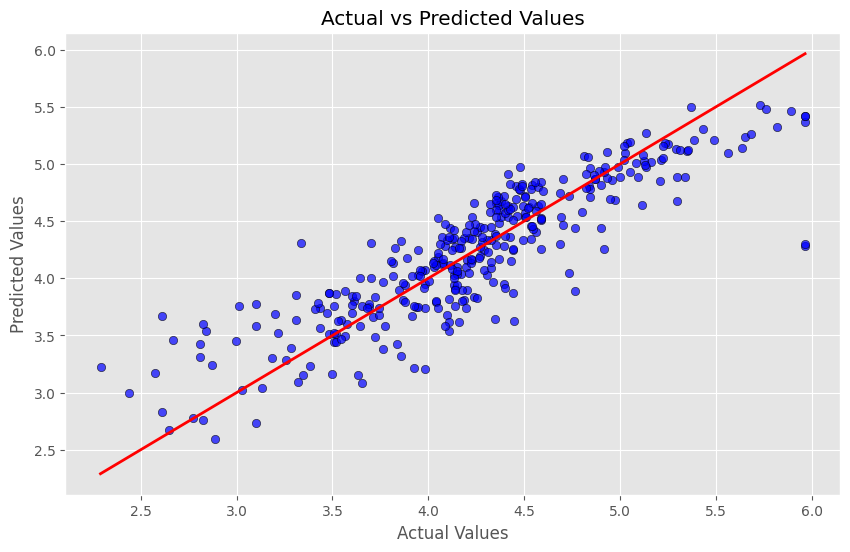

<Figure size 640x480 with 0 Axes>

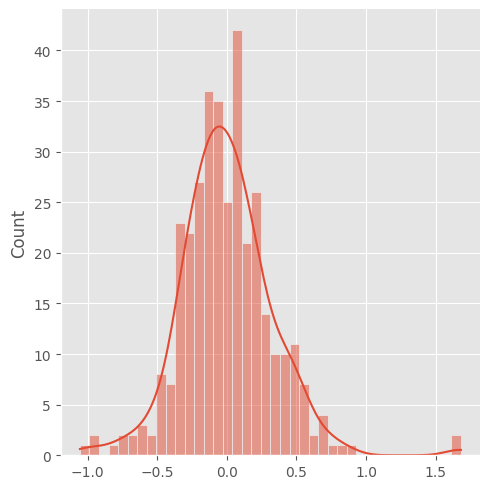

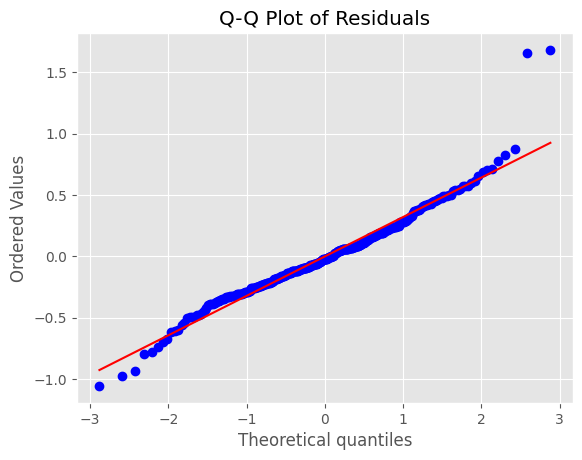

In [ ]:
ipp.actVpre(y_test,y_pred)
# Clear the current figure
ipp.pylab.figure()

ipp.sns.displot(residuals, bins=40, kde=True)
# Clear the current figure
ipp.pylab.figure()

# Q-Q Plot for Residuals
ipp.stats.probplot(residuals, dist="norm", plot=ipp.pylab)
ipp.pylab.title('Q-Q Plot of Residuals')
ipp.pylab.show()

### Calculate MAE and MSE

In [ ]:
mae = ipp.mean_absolute_error(y_test, y_pred)
mse = ipp.mean_squared_error(y_test, y_pred)
rmse = ipp.np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 0.24230711365385882
Mean Squared Error (MSE): 0.10685288570610743
Root Mean Squared Error (RMSE): 0.32688359656934063


Sure, let's break down the evaluation metrics for your model predictions:

### 1. Mean Absolute Error (MAE)
**Value: 0.23290744959413373**

**Explanation:**
The Mean Absolute Error (MAE) is the average of the absolute differences between the predicted values and the actual values. It gives you an idea of how far your predictions are from the actual values on average. The lower the MAE, the better your model is at predicting the target variable. An MAE of 0.2329 means that, on average, your model's predictions are off by about 0.2329 units from the actual values.

### 2. Mean Squared Error (MSE)
**Value: 0.09919687856882325**

**Explanation:**
The Mean Squared Error (MSE) is the average of the squared differences between the predicted values and the actual values. It gives you a sense of the magnitude of the errors, penalizing larger errors more than smaller ones due to squaring. The lower the MSE, the better your model. An MSE of 0.0992 indicates that the average squared difference between the predicted and actual values is 0.0992.

### 3. Root Mean Squared Error (RMSE)
**Value: 0.31495535964454274**

**Explanation:**
The Root Mean Squared Error (RMSE) is the square root of the MSE. It brings the error metric back to the same unit as the target variable, making it easier to interpret. Like the MSE, a lower RMSE indicates a better fit. An RMSE of 0.315 means that, on average, the predictions deviate from the actual values by about 0.315 units.

### Summary
These metrics collectively provide insights into your model's performance:

- **MAE**: The average error magnitude is around 0.233 units.
- **MSE**: The average squared error is around 0.0992 units.
- **RMSE**: The error magnitude is approximately 0.315 units, making it easier to compare with the scale of the target variable.

All these metrics suggest that while the model has some error, it’s important to consider the context and scale of your target variable to determine if these errors are acceptable for your specific use case.

## Changing the split and checking

In [ ]:
splits = [0.5, 0.6, 0.7]
predictor_variable = data.filter(regex=f'^{pattern}').columns[0]
for split in splits:
    compModel.update(ipp.corr_Linear_RegModel(0, data, predictor_variable,split))

    split_int = int(split * 100)
    complement_int = int((1 - split) * 100)
    name = {split_int: complement_int}

    compModel['Linear_Model']['Threshold value'] = name
    ipp.filter_def(compModel)
    print(compModel)
    model_Eval = ipp.pd.concat([model_Eval,ipp.add_model_info(compModel)],ignore_index=True)

Success
Best Model:
Key: Linear_Model
Value: {'Threshold value': {50: 50}, 'Train': 0.7767940887398721, 'Test': 0.7520150647379106, 'OLS_model': <statsmodels.regression.linear_model.OLS object at 0x31a5239b0>}
{'Linear_Model': {'Threshold value': {50: 50}, 'Train': 0.7767940887398721, 'Test': 0.7520150647379106, 'OLS_model': <statsmodels.regression.linear_model.OLS object at 0x31a5239b0>}}
Success
Best Model:
Key: Linear_Model
Value: {'Threshold value': {60: 40}, 'Train': 0.7670250247581861, 'Test': 0.7543646925644865, 'OLS_model': <statsmodels.regression.linear_model.OLS object at 0x317cde420>}
{'Linear_Model': {'Threshold value': {60: 40}, 'Train': 0.7670250247581861, 'Test': 0.7543646925644865, 'OLS_model': <statsmodels.regression.linear_model.OLS object at 0x317cde420>}}
Success
Best Model:
Key: Linear_Model
Value: {'Threshold value': {70: 30}, 'Train': 0.7817790999480785, 'Test': 0.7118906674105528, 'OLS_model': <statsmodels.regression.linear_model.OLS object at 0x317939970>}
{'Li

# What to do ?
Sure, here's a list of some common remedial actions to address heteroscedasticity in linear regression models:

1. **Transform Variables**: Transforming the dependent or independent variables can sometimes help stabilize the variance of the errors. For example, you can try using logarithmic transformations or square root transformations.

2. **Weighted Least Squares**: In cases where the variance of the errors is proportional to some function of the independent variables, you can use weighted least squares (WLS). WLS assigns different weights to each observation based on the expected variance of the error.

3. **Robust Standard Errors**: Instead of relying on the assumption of homoscedasticity, you can use robust standard errors, which provide more reliable estimates of the standard errors of the regression coefficients in the presence of heteroscedasticity.

4. **Generalized Least Squares (GLS)**: GLS is a method that explicitly models the covariance structure of the errors. It allows for heteroscedasticity and autocorrelation in the errors and provides efficient estimates of the coefficients.

5. **Box-Cox Transformation**: The Box-Cox transformation is a family of power transformations that can stabilize the variance of the errors. It involves estimating a parameter lambda (λ) that best stabilizes the variance.

6. **Use Robust Regression Techniques**: Techniques like robust regression, such as M-estimation or Huber regression, are less sensitive to outliers and can provide more reliable estimates in the presence of heteroscedasticity.

7. **Use Residual Diagnostics**: Conduct diagnostic tests to identify influential observations or outliers that may be driving the heteroscedasticity. Removing or downweighting these observations can sometimes mitigate the issue.

8. **Model Specification**: Review the specification of your model and consider whether adding or removing variables or using different functional forms could improve the fit and reduce heteroscedasticity.

9. **Clustered Standard Errors**: If your data has a clustered or grouped structure (e.g., panel data or repeated measures), you can use clustered standard errors to account for the correlation within clusters, which may help address heteroscedasticity.

10. **Check for Misspecification**: Ensure that your model adequately captures the relationship between the dependent and independent variables. Misspecification of the model can lead to spurious heteroscedasticity.

These remedial actions can help mitigate the effects of heteroscedasticity and improve the reliability of your regression analysis. The choice of method depends on the specific characteristics of your data and the goals of your analysis.

# visulize the model performance scores

In [ ]:
model_Eval

Model  Train Score  Test Score
0          Original     0.739802    0.689397
1               sd3     0.737639    0.787228
2          AF_Stand     0.737639    0.787228
3               0.0     0.737639    0.787228
4               0.3     0.737639    0.787228
5               0.4     0.737639    0.787228
6               0.5     0.705965    0.738471
7               0.6     0.705965    0.738471
8               0.7     0.625349    0.592438
9   slightly_skewed     0.728646    0.775425
10    Highly_skewed     0.765161    0.792734
11         {50: 50}     0.776794    0.752015
12         {60: 40}     0.767025    0.754365
13         {70: 30}     0.781779    0.711891

In [ ]:
compModel

{'Linear_Model': {'Threshold value': {70: 30},
  'Train': 0.7817790999480785,
  'Test': 0.7118906674105528,
  'OLS_model': <statsmodels.regression.linear_model.OLS at 0x317939970>}}

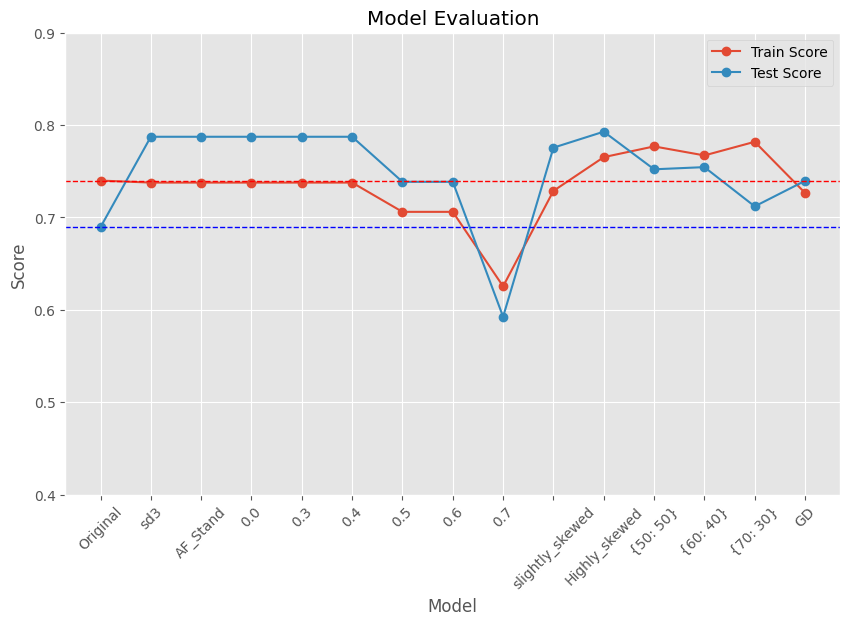

In [ ]:
ipp.plot_model_eval(model_Eval)

In [ ]:
ipp.reg.score(X_train,y_train)

## GD is set to True

In [ ]:
x = interModelWork(data,'GD',compModel,True)
print(x)

GD is set to  True
Success
{'Threshold value': 0, 'Train': 0.7264606108844351, 'Test': 0.7395294177588974, 'OLS_model': None, 'Theta': array([[ 4.06764315],
       [-0.35048032],
       [-0.03012898],
       [-0.15001863],
       [-0.04551053],
       [ 0.18812799],
       [-0.01992356],
       [ 0.06237301],
       [-0.21381187],
       [-0.05035152],
       [ 0.00442598],
       [-0.0623768 ]])}
{'Linear_Model': {'Threshold value': 'GD', 'Train': 0.7264606108844351, 'Test': 0.7395294177588974, 'OLS_model': None, 'Theta': array([[ 4.06764315],
       [-0.35048032],
       [-0.03012898],
       [-0.15001863],
       [-0.04551053],
       [ 0.18812799],
       [-0.01992356],
       [ 0.06237301],
       [-0.21381187],
       [-0.05035152],
       [ 0.00442598],
       [-0.0623768 ]])}}
Best Model:
Key: Linear_Model
Value: {'Threshold value': 'GD', 'Train': 0.7264606108844351, 'Test': 0.7395294177588974, 'OLS_model': None, 'Theta': array([[ 4.06764315],
       [-0.35048032],
       [-0.0

In [ ]:
model_Eval = ipp.pd.concat([model_Eval,ipp.add_model_info(x)],ignore_index=True)
print(model_Eval)

              Model  Train Score  Test Score
0          Original     0.739802    0.689397
1               sd3     0.737639    0.787228
2          AF_Stand     0.737639    0.787228
3               0.0     0.737639    0.787228
4               0.3     0.737639    0.787228
5               0.4     0.737639    0.787228
6               0.5     0.705965    0.738471
7               0.6     0.705965    0.738471
8               0.7     0.625349    0.592438
9   slightly_skewed     0.728646    0.775425
10    Highly_skewed     0.765161    0.792734
11         {50: 50}     0.776794    0.752015
12         {60: 40}     0.767025    0.754365
13         {70: 30}     0.781779    0.711891
14               GD     0.726461    0.739529


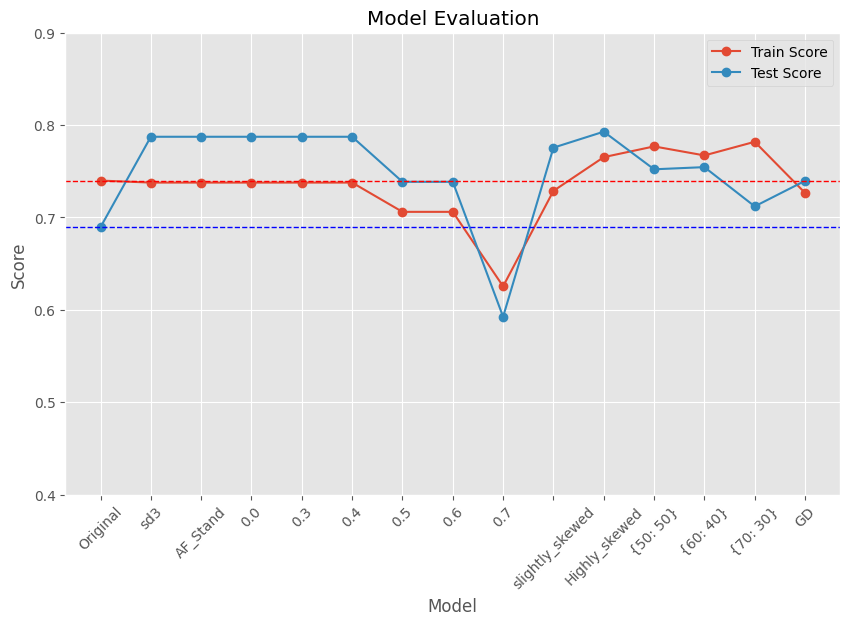

In [ ]:
ipp.plot_model_eval(model_Eval)

In [52]:
import pandas as pd
import openai
import json

openai.api_key = 'xxxx'


In [40]:
def categorize_columns_via_api(df):
    # Convert the DataFrame to a dictionary format
    df_dict = df.to_dict(orient='list')

    # Create a prompt to send to GPT
    prompt = (
        "Given the following DataFrame represented as a dictionary, please categorize the columns into "
        "categorical columns, ordinal columns, and continuous columns. "
        "Return the result in JSON format with keys 'categorical_cols', 'ordinal_cols', and 'continuous_cols'.\n\n"
        "DataFrame:\n" + json.dumps(df_dict)
    )

    # # Make the API call
    # response = openai.Completion.create(
    #     model="davinci",
    #     prompt=prompt,
    #     max_tokens=1000,
    #     temperature=0
    # )

    # Parse the response
    result = json.loads(response.choices[0].text.strip())
    return result['categorical_cols'], result['ordinal_cols'], result['continuous_cols']


In [41]:
categorical_columns, ordinal_columns, continuous_columns = categorize_columns_via_api(df)

print("Categorical Columns:", categorical_columns)
print("Ordinal Columns:", ordinal_columns)
print("Continuous Columns:", continuous_columns)

NameError: name 'json' is not defined

# <center>END OF SECTION - 3 </center>

## Hyper paramater tuning

### Using Lasso (L1 Regularized) Regression Model

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the GridSearchCV with Lasso model
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_lasso = grid_search.best_estimator_

# Evaluate the best model
train_score = best_lasso.score(X_train, y_train)
test_score = best_lasso.score(X_test, y_test)

print(f'Best Alpha: {grid_search.best_params_["alpha"]}')
print(f'Training R^2 Score: {train_score}')
print(f'Testing R^2 Score: {test_score}')
print(f'Lasso Coefficients: {best_lasso.coef_}')


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Assuming X_train, Y_train, X_test, and Y_test are already defined

# Define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the GridSearchCV with Ridge model
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')

# Fit the grid search to the training data
grid_search.fit(X_train, Y_train)

# Get the best model
best_ridge = grid_search.best_estimator_

# Evaluate the best model
train_score = best_ridge.score(X_train, Y_train)
test_score = best_ridge.score(X_test, Y_test)

print(f'Best Alpha: {grid_search.best_params_["alpha"]}')
print(f'Training R^2 Score: {train_score}')
print(f'Testing R^2 Score: {test_score}')
print(f'Ridge Coefficients: {best_ridge.coef_}')

# Predict on the training data
Y_train_pred = best_ridge.predict(X_train)

# Predict on the testing data
Y_test_pred = best_ridge.predict(X_test)

# Calculate Mean Squared Error for training data
train_mse = mean_squared_error(Y_train, Y_train_pred)

# Calculate Mean Squared Error for testing data
test_mse = mean_squared_error(Y_test, Y_test_pred)

# Print the evaluation metrics
print(f'Training Mean Squared Error: {train_mse}')
print(f'Testing Mean Squared Error: {test_mse}')


In [ ]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals_train = y_train - best_ridge.predict(X_train)
residuals_test = y_test - best_ridge.predict(X_test)

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, residuals_train)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs. Actuals (Training)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_test)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuals vs. Actuals (Testing)')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(best_ridge, X_train, y_train, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = ipp.np.mean(train_scores, axis=1)
test_scores_mean = ipp.np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Generate a synthetic dataset (for example purposes)
X, y = make_regression(n_samples=1000, n_features=13, noise=0.1)

# Split the data correctly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Ridge regression model
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

# Evaluate the model
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)

print(f'Training R^2 Score: {train_score}')
print(f'Testing R^2 Score: {test_score}')


In [ ]:
compModel

In [ ]:
X_train,X_test,Y_train,Y_test,Y_pred = ipp.extract_info_model(compModel)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Assuming X_train and y_train are your training features and labels
# Define your linear regression model
model = LinearRegression()

# Define the range of number of folds to try
num_folds_range = [3, 5, 7, 10]

# Store all cross-validation scores
all_cv_scores = {}

# Iterate over different number of folds
for num_folds in num_folds_range:
    # Define the cross-validation method (e.g., KFold)
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, Y_train, cv=kf, scoring='r2')

    # Store the cross-validation scores
    all_cv_scores[num_folds] = cv_scores

# Print all cross-validation scores
print("Cross-validation scores for different numbers of folds:")
for num_folds, cv_scores in all_cv_scores.items():
    print(f"Number of folds: {num_folds}, Mean R^2 score: {cv_scores.mean()}, Standard deviation: {cv_scores.std()}")

# Find the best number of folds with the highest mean cross-validation score
best_num_folds = max(all_cv_scores, key=lambda k: all_cv_scores[k].mean())
best_mean_cv_score = all_cv_scores[best_num_folds].mean()

# Print the best number of folds and the corresponding mean cross-validation score
print("\nBest number of folds:", best_num_folds)
print("Mean cross-validation score with the best number of folds:", best_mean_cv_score)
# compModel.update()

print(all_cv_scores[best_num_folds])
print(type(all_cv_scores[best_num_folds]))

In [ ]:
compModel

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

# Define range of alpha values to search for Lasso and Ridge
lasso_params = {'alpha': [0.1, 1, 10]}
ridge_params = {'alpha': [0.1, 1, 10]}

# Perform cross-validation for Lasso
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=best_num_folds)
lasso_grid.fit(X_train, Y_train)

# Perform cross-validation for Ridge
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=best_num_folds)
ridge_grid.fit(X_train, Y_train)

# Select best hyperparameters for Lasso and Ridge
best_lasso_alpha = lasso_grid.best_params_['alpha']
best_ridge_alpha = ridge_grid.best_params_['alpha']

# Train Lasso model with the best alpha
lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, Y_train)

# Train Ridge model with the best alpha
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, Y_train)

# Evaluate Lasso model
lasso_train_score = lasso_model.score(X_train, Y_train)
lasso_test_score = lasso_model.score(X_test, Y_test)

# Evaluate Ridge model
ridge_train_score = ridge_model.score(X_train, Y_train)
ridge_test_score = ridge_model.score(X_test, Y_test)

# Print evaluation scores
print("Lasso Train Score:", lasso_train_score)
print("Lasso Test Score:", lasso_test_score)
print("Ridge Train Score:", ridge_train_score)
print("Ridge Test Score:", ridge_test_score)


## StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression  # Example model, replace with your model

# Initialize the StandardScaler for features and target
sc_X = StandardScaler()
sc_y = StandardScaler()

# Fit and transform the training features
X_train_scaled = sc_X.fit_transform(X_train)

# Transform the test features using the same scaler
X_test_scaled = sc_X.transform(X_test)

# Fit and transform the target training data
y_train_scaled = sc_y.fit_transform(Y_train.reshape(-1, 1))

In [ ]:
# Example of using a pipeline for scaling and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())  # Replace with your actual model
])

# Fit the pipeline on the scaled training data
pipeline.fit(X_train, y_train_scaled.ravel())

In [ ]:
# Make predictions on the scaled test data
predictions_scaled = pipeline.predict(X_test)

# Inverse transform the scaled predictions to original scale
predictions = sc_y.inverse_transform(predictions_scaled.reshape(-1, 1))

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are your training and testing data

# L1 regularization (Lasso)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_train_score = lasso_model.score(X_train, y_train)
print(lasso_train_score)
lasso_test_score = lasso_model.score(X_test, y_test)
print(lasso_test_score)

# L2 regularization (Ridge)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_train_score = ridge_model.score(X_train, y_train)
print(ridge_train_score)
ridge_test_score = ridge_model.score(X_test, y_test)
print(ridge_test_score)

# Multi regularization (ElasticNet)
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet_model.fit(X_train, y_train)
elasticnet_train_score = elasticnet_model.score(X_train, y_train)
print(elasticnet_train_score)
elasticnet_test_score = elasticnet_model.score(X_test, y_test)
print(elasticnet_test_score)

In [ ]:
# Compare and update the best model
best_score = max(compModel['Linear_Model']['Test'], lasso_test_score, ridge_test_score, elasticnet_test_score)
best_model = ''
best_model_params = {}
print("Linear_Model Test Score:", compModel['Linear_Model']['Test'])
print("Lasso Test Score:", lasso_test_score)
print("Ridge Test Score:", ridge_test_score)
print("ElasticNet Test Score:", elasticnet_test_score)
if best_score == compModel['Linear_Model']['Test']:
    best_model = 'Linear_Model'
    best_model_params = compModel['Linear_Model']
elif best_score == lasso_test_score:
    best_model = 'Lasso'
    best_model_params = {'Threshold value': 0, 'Train': lasso_train_score, 'Test': lasso_test_score, 'Model': lasso_model}
elif best_score == ridge_test_score:
    best_model = 'Ridge'
    best_model_params = {'Threshold value': 0, 'Train': ridge_train_score, 'Test': ridge_test_score, 'Model': ridge_model}
elif best_score == elasticnet_test_score:
    best_model = 'ElasticNet'
    best_model_params = {'Threshold value': 0, 'Train': elasticnet_train_score, 'Test': elasticnet_test_score, 'Model': elasticnet_model}

compModel['Best_Model'] = {best_model: best_model_params}
print("Best Model:", compModel['Best_Model'])

In [ ]:
compModel

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data = {'A': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
df = pd.DataFrame(data)

# Plot histogram
plt.hist(df['A'], bins=10, edgecolor='black')
plt.title('Histogram of A')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Q-Q plot
import scipy.stats as stats
stats.probplot(df['A'], dist="norm", plot=plt)
plt.title('Q-Q Plot of A')
plt.show()

In [ ]:
from scipy.stats import shapiro

# # Example DataFrame
# data = {'A': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
# df = pd.DataFrame(data)

# Shapiro-Wilk test
stat, p = shapiro(df['A'])
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


In [ ]:
from scipy.stats import anderson

# Example DataFrame
data = {'A': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
df = pd.DataFrame(data)

# Anderson-Darling test
result = anderson(df['A'], dist='norm')
print('Anderson-Darling Test: Statistic=%.3f' % result.statistic)

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('%.3f: %.3f, data looks Gaussian (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look Gaussian (reject H0)' % (sl, cv))


In [ ]:
from scipy.stats import kstest

# Example DataFrame
data = {'A': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
df = pd.DataFrame(data)

# Kolmogorov-Smirnov test
stat, p = kstest(df['A'], 'norm', args=(df['A'].mean(), df['A'].std()))
print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


In [ ]:
for i in df.columns:
    print(i)
    # Kolmogorov-Smirnov test
    # stat, p = kstest(df[i], 'norm', args=(df[i].mean(), df[i].std()))
    # print('Kolmogorov-Smirnov Test: Statistics=%.3f, p=%.3f' % (stat, p))

    # if p > 0.05:
    #     print('Sample looks Gaussian (fail to reject H0)')
    # else:
    #     print('Sample does not look Gaussian (reject H0)')
    stat, p = shapiro(df[i])
    print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

    if p > 0.05:
        print('Sample looks Gaussian (FAIL to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the dataset
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 3, 5, 4, 6, 7, 8, 9, 10, 12])

# Step 2: Initialize parameters
m = 0  # initial slope
b = 0  # initial intercept
learning_rate = 0.01
num_iterations = 1000
cost_history = []

# Step 3: Define the cost function
def compute_cost(x, y, m, b):
    y_pred = m * x + b
    cost = np.mean((y - y_pred) ** 2)
    return cost

# Step 4: Gradient Descent
for i in range(num_iterations):
    y_pred = m * x + b
    dm = -2 * np.mean((y - y_pred) * x)  # gradient with respect to m
    db = -2 * np.mean(y - y_pred)        # gradient with respect to b
    m -= learning_rate * dm              # update m
    b -= learning_rate * db              # update b
    cost = compute_cost(x, y, m, b)
    cost_history.append(cost)
    if i % 100 == 0:  # Print the cost every 100 iterations
        print(f"Iteration {i}: Cost {cost}, m {m}, b {b}")

print(f"Final parameters: m = {m}, b = {b}")
print(f"Final cost: {compute_cost(x, y, m, b)}")

# Step 5: Plot the initial data points and the fitted line
plt.figure(figsize=(12, 6))

# Plot data points
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, m * x + b, color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points and Fitted Line')
plt.legend()

# Plot cost function over iterations
plt.subplot(1, 2, 2)
plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the dataset
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 3, 5, 4, 6, 7, 8, 9, 10, 12])

# Define the cost function
def compute_cost(m, b, x, y):
    y_pred = m * x + b
    cost = np.mean((y - y_pred) ** 2)
    return cost

# Generate values for m and b
m_values = np.linspace(-1, 3, 50)
b_values = np.linspace(-1, 3, 50)
M, B = np.meshgrid(m_values, b_values)
Z = np.array([[compute_cost(m, b, x, y) for m in m_values] for b in b_values])

# Plot the cost function as a 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, cmap='viridis')
ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate a complex dataset with noise
np.random.seed(42)  # for reproducibility
x = np.linspace(0, 10, 50)
y = 2 * x + 1 + np.random.normal(scale=2, size=x.shape)

# Step 2: Initialize parameters for gradient descent
m = 0  # initial slope
b = 0  # initial intercept
learning_rate = 0.01
num_iterations = 1000
cost_history = []

# Define the cost function
def compute_cost(x, y, m, b):
    y_pred = m * x + b
    cost = np.mean((y - y_pred) ** 2)
    return cost

# Step 3: Gradient Descent
for i in range(num_iterations):
    y_pred = m * x + b
    dm = -2 * np.mean((y - y_pred) * x)  # gradient with respect to m
    db = -2 * np.mean(y - y_pred)        # gradient with respect to b
    m -= learning_rate * dm              # update m
    b -= learning_rate * db              # update b
    cost = compute_cost(x, y, m, b)
    cost_history.append(cost)
    if i % 100 == 0:  # Print the cost every 100 iterations
        print(f"Iteration {i}: Cost {cost}, m {m}, b {b}")

print(f"Final parameters: m = {m}, b = {b}")
print(f"Final cost: {compute_cost(x, y, m, b)}")

# Step 4: Plot the initial data points and the fitted line
plt.figure(figsize=(12, 6))

# Plot data points and fitted line
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, m * x + b, color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data points and Fitted Line')
plt.legend()

# Plot cost function over iterations
plt.subplot(1, 2, 2)
plt.plot(range(num_iterations), cost_history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')

plt.tight_layout()
plt.show()

# Step 5: Visualize the cost function surface in 3D
m_values = np.linspace(-1, 5, 50)
b_values = np.linspace(-1, 5, 50)
M, B = np.meshgrid(m_values, b_values)
Z = np.array([[compute_cost(x, y, m, b) for m in m_values] for b in b_values])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, cmap='viridis')
ax.set_xlabel('Slope (m)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple quadratic function for the loss
def loss_function(x, y):
    return x**2 + y**2

# Derivatives of the loss function
def gradient(x, y):
    return 2*x, 2*y

# Initialize parameters
x_init, y_init = 8.0, 8.0
learning_rate = 0.1
iterations = 50

# Batch Gradient Descent
x, y = x_init, y_init
path_batch = [(x, y)]
for i in range(iterations):
    grad_x, grad_y = gradient(x, y)
    x -= learning_rate * grad_x
    y -= learning_rate * grad_y
    path_batch.append((x, y))

# Mini-Batch Gradient Descent
x, y = x_init, y_init
path_mini_batch = [(x, y)]
for i in range(iterations):
    grad_x, grad_y = gradient(x, y)
    # Simulate mini-batch by adding some noise
    noise_x, noise_y = np.random.normal(scale=0.1, size=2)
    x -= learning_rate * (grad_x + noise_x)
    y -= learning_rate * (grad_y + noise_y)
    path_mini_batch.append((x, y))

# Stochastic Gradient Descent
x, y = x_init, y_init
path_sgd = [(x, y)]
for i in range(iterations):
    grad_x, grad_y = gradient(x, y)
    # Simulate SGD by adding larger noise
    noise_x, noise_y = np.random.normal(scale=1.0, size=2)
    x -= learning_rate * (grad_x + noise_x)
    y -= learning_rate * (grad_y + noise_y)
    path_sgd.append((x, y))

# Plotting the paths
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Contour plot
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = loss_function(X, Y)

for ax, path, title in zip(axes, [path_batch, path_mini_batch, path_sgd], 
                           ['Batch Gradient Descent', 'Mini-Batch Gradient Descent', 'Stochastic Gradient Descent']):
    ax.contour(X, Y, Z, levels=30)
    path = np.array(path)
    ax.plot(path[:, 0], path[:, 1], marker='o', color='red')
    ax.plot(path[:, 0], path[:, 1], linestyle='-', color='red')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid(True)

plt.show()


## PDF report

In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.utils import ImageReader
import matplotlib.pyplot as plt

# Step 1: Generate a Graph and Save It
plt.figure(figsize=(4, 3))
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], marker="o")
plt.title("Sample Graph")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
graph_path = "graph.png"
plt.savefig(graph_path)  # Save the plot as an image
plt.close()

# Step 2: Create PDF Report
pdf_path = "report.pdf"
c = canvas.Canvas(pdf_path, pagesize=letter)
width, height = letter

# Step 3: Add Text to the PDF
c.setFont("Helvetica", 14)
c.drawString(100, height - 100, "Analysis Report")
c.setFont("Helvetica", 12)
c.drawString(100, height - 130, "This report contains the analysis of the dataset.")
c.drawString(100, height - 150, "Key Observations:")
c.drawString(120, height - 170, "• Data shows an increasing trend.")
c.drawString(120, height - 190, "• Model accuracy: 92%")
c.drawString(120, height - 210, "• Further tuning may improve results.")

# Step 4: Add Graph to PDF
graph = ImageReader(graph_path)
c.drawImage(graph, 100, height - 400, width=300, height=200)

# Step 5: Save PDF
c.save()
print(f"Report saved as {pdf_path}")
